<a href="https://colab.research.google.com/github/A-n-a-s-t-a-s-i-i-a/Python-for-DA-projects/blob/main/Sales_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Mate_academy/Files/Final_project

products_data = pd.read_csv("products.csv")
print(f"Products data:\n{products_data.head()}")
print()
countries_data = pd.read_csv("countries.csv")
print(f"Countries data:\n{countries_data.head()}")
print()
events_data = pd.read_csv("events.csv")
print(f"Events data:\n{events_data.head()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_academy/Files/Final_project
Products data:
     id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

Countries data:
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

Events data:
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/201

Датасет Products має 2 колонки, одна з яких - унікальний id товару, а інша - категорія товару.<br>

Датасет Countries має 5 колонок з інформацією про країни:
*  назва країни,
*  двозначний код країни,
*  тризначний код країни,
*  регіон,
*  субрегіон.<br>

Датасет Events має 10 колонок з інформацією про замовлення:
*  унікальне id замовлення,
*  дата замовлення,
*  дата відправки,
*  пріорітетність замовлення,
*  тризначний код країни,
*  унікальний id товару,
*  канали продажів,
*  кількість проданих одиниць товару,
*  ціна товару,
*  вартість товару.<br>

Ключові поля що поєднують таблиці:
*  products_data["id"] = events_data["Product ID"]
*  events_data["Country Code"] = countries_data["alpha-3"]

In [ ]:
print(f"Розмір таблиці products: {products_data.shape}")
print(f"Розмір таблиці countries: {countries_data.shape}")
print(f"Розмір таблиці events: {events_data.shape}")

Розмір таблиці products: (12, 2)
Розмір таблиці countries: (249, 5)
Розмір таблиці events: (1330, 10)


In [ ]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
duplicate_rows_products = products_data.duplicated()
print(duplicate_rows_products.sum())

0


В таблиці **products** всі дані розпізнаються коректно, немає пропущених значень та дублікатів.

In [ ]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
print(countries_data.isna().sum() / countries_data.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
missing_rows_countries = countries_data[countries_data.isna().any(axis=1)]
print(missing_rows_countries)

           name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa


In [ ]:
print("ATA" in events_data["Country Code"].values)
print("NAM" in events_data["Country Code"].values)

False
False


In [ ]:
duplicate_rows_countries = countries_data.duplicated()
print(duplicate_rows_countries.sum())

0


In [ ]:
ecom_countries = countries_data.dropna()
ecom_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        247 non-null    object
 1   alpha-2     247 non-null    object
 2   alpha-3     247 non-null    object
 3   region      247 non-null    object
 4   sub-region  247 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB


Дані у колонках таблиці **countries** розпізнаються вірно, дублікатів немає, були пропущені значення а колонках alpha-2, region, та sub-region. У зв'язку з тим, що країни з пропущеними даними не зустрічаються у таблиці events, було прийнято рішення їх видалити, тая як вони не повпливають на подальші розрахунки.


In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
print(events_data.isna().sum() / events_data.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
ecom_events = events_data
ecom_events["Order Date"] = pd.to_datetime(ecom_events["Order Date"])
ecom_events["Ship Date"] = pd.to_datetime(ecom_events["Ship Date"])
ecom_events = ecom_events.dropna(subset=["Units Sold"])
ecom_events["Sales Channel"] = ecom_events["Sales Channel"].str.capitalize()
ecom_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


<ipython-input-14-22e39c9bb610>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_events["Sales Channel"] = ecom_events["Sales Channel"].str.capitalize()


In [ ]:
duplicate_rows = ecom_events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0


In [ ]:
ecom_events.describe()

Order ID                     Order Date  \
count  1.328000e+03                           1328   
mean   5.416231e+08  2013-10-11 22:28:54.939759104   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.213291e+08            2011-12-14 06:00:00   
50%    5.399925e+08            2013-10-15 12:00:00   
75%    7.547357e+08            2015-08-29 12:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573496e+08                            NaN   

                           Ship Date   Product ID   Units Sold   Unit Price  \
count                           1328  1328.000000  1328.000000  1328.000000   
mean   2013-11-05 17:22:02.891566336  5787.775602  4952.201807   264.913245   
min              2010-01-10 00:00:00  1270.000000     2.000000     9.330000   
25%              2012-01-02 00:00:00  3127.000000  2356.750000    81.730000   
50%              2013-11-05 12:00:00  5988.000000  4962.000000   154.060000   
75%              2015-10-04 18:00:00  8681.000000  7459.500000   437.200000   
max              2017-08-31 00:00:00  8969.000000  9999.000000   668.270000   
std                              NaN  2820.635702  2905.198996   217.386320   

         Unit Cost  
count  1328.000000  
mean    187.211521  
min       6.920000  
25%      35.840000  
50%      97.440000  
75%     263.330000  
max     524.960000  
std     176.187801

В таблиці **events** усі дані окрім дат розпізнаються вірно, дати тепер перетворені на формат datetime. Є пропущені значення у колонках Country Code та Units Sold, оскільки у стовпці Units Sold пропущених даних менше 1% було прийняте рішення видалити ці стовпці. Country Code поки залишимо як є, оскільки доля пропущених значень більше 5%, ці дані будуть фільтруватись при розрахунках по країнах. Дублікатів у таблиці не було виявлено. В колонках Unit Price та Unit Cost середнє значення значно більше за медіанне, це вказує на те, що є товари з дуже великою ціною та вартістю, порівняно з іншими товарами.

In [ ]:
joined_data = pd.merge(products_data, ecom_events, left_on="id", right_on="Product ID", how="left")
joined_data = pd.merge(joined_data, ecom_countries, left_on="Country Code", right_on="alpha-3", how="left")
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1328 non-null   int64         
 1   item_type       1328 non-null   object        
 2   Order ID        1328 non-null   int64         
 3   Order Date      1328 non-null   datetime64[ns]
 4   Ship Date       1328 non-null   datetime64[ns]
 5   Order Priority  1328 non-null   object        
 6   Country Code    1246 non-null   object        
 7   Product ID      1328 non-null   int64         
 8   Sales Channel   1328 non-null   object        
 9   Units Sold      1328 non-null   float64       
 10  Unit Price      1328 non-null   float64       
 11  Unit Cost       1328 non-null   float64       
 12  name            1246 non-null   object        
 13  alpha-2         1246 non-null   object        
 14  alpha-3         1246 non-null   object        
 15  regi

In [ ]:
joined_data = joined_data.drop(["id", "Country Code", "Product ID", "alpha-2", "alpha-3"], axis=1)
joined_data = joined_data.rename(columns={"name": "Country"})
joined_data.head()

item_type   Order ID Order Date  Ship Date Order Priority Sales Channel  \
0    Cereal  100640618 2014-10-08 2014-10-18              M        Online   
1    Cereal  100983083 2016-08-11 2016-08-11              C       Offline   
2    Cereal  104008615 2011-01-23 2011-02-22              M        Online   
3    Cereal  118659913 2014-08-02 2014-08-17              C        Online   
4    Cereal  123544108 2010-05-13 2010-06-22              M        Online   

   Units Sold  Unit Price  Unit Cost         Country  region       sub-region  
0       650.0       205.7     117.11          Norway  Europe  Northern Europe  
1      1993.0       205.7     117.11          Serbia  Europe  Southern Europe  
2      7315.0       205.7     117.11         Germany  Europe   Western Europe  
3      2960.0       205.7     117.11  Czech Republic  Europe   Eastern Europe  
4      8302.0       205.7     117.11         Austria  Europe   Western Europe

In [ ]:
print(f"Orders count: {joined_data.shape[0]}")
print(f"Units Sold count: {joined_data['Units Sold'].sum()}")
print(f"Counrties count: {joined_data['Country'].nunique()}")

joined_data["Revenue"] = (joined_data['Unit Price'] * joined_data['Units Sold'])
print(f"Revenue: {joined_data['Revenue'].sum()}")

joined_data["Cost"] = (joined_data['Unit Cost'] * joined_data['Units Sold'])
print(f"Cost: {joined_data['Cost'].sum()}")

joined_data["Profit"] = (joined_data["Revenue"] - joined_data["Cost"])
print(f"Profit: {joined_data['Profit'].sum()}")

Orders count: 1328
Units Sold count: 6576524.0
Counrties count: 45
Revenue: 1702129408.2100003
Cost: 1200694949.21
Profit: 501434459.0


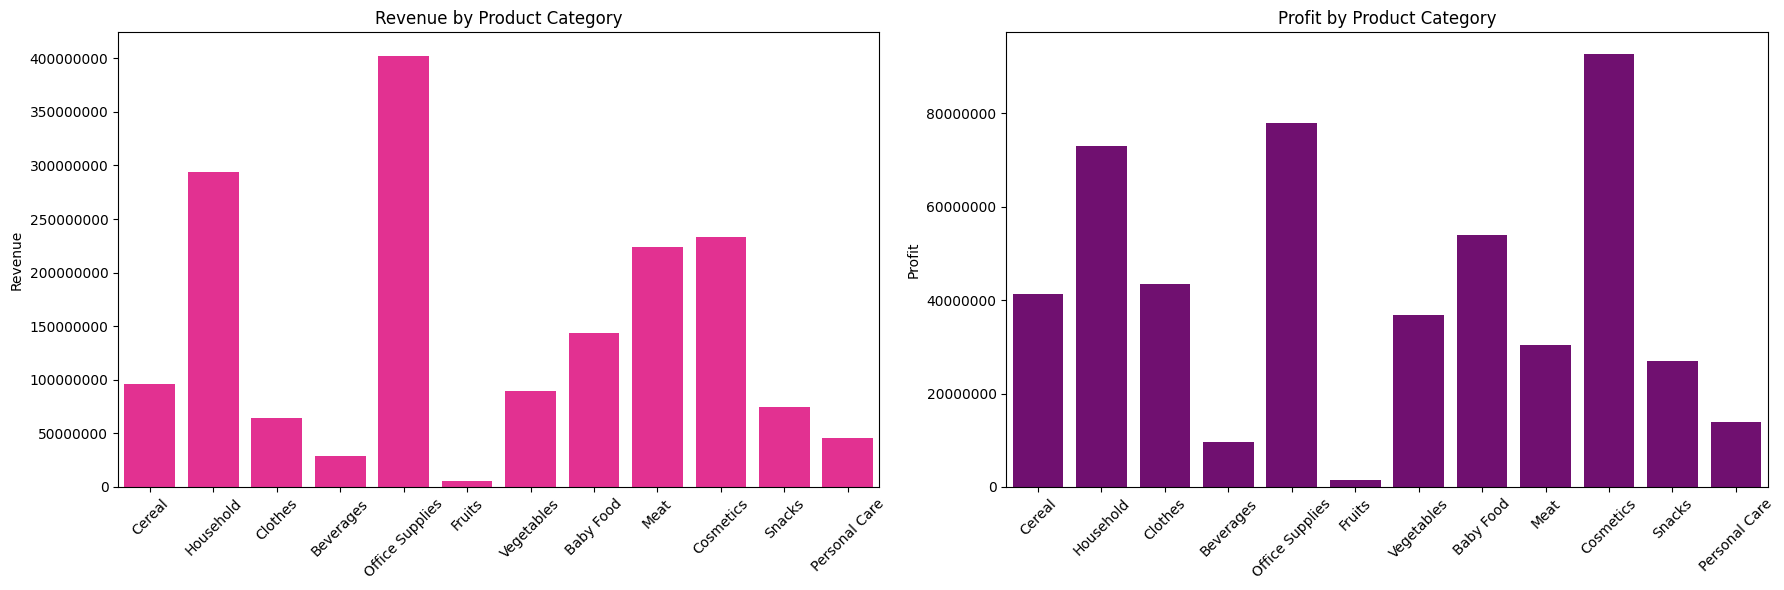

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(
    x='item_type',
    y='Revenue',
    data=joined_data,
    estimator=sum,
    color='deeppink',
    errorbar=("ci", False),
    ax=ax[0]
)
ax[0].set_title('Revenue by Product Category')
ax[0].set_xlabel('')
ax[0].set_ylabel('Revenue')
ax[0].tick_params(axis='x', rotation=45)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(
    x='item_type',
    y='Profit',
    data=joined_data,
    estimator=sum,
    color='purple',
    errorbar=("ci", False),
    ax=ax[1]
)
ax[1].set_title('Profit by Product Category')
ax[1].set_xlabel('')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=45)
ax[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

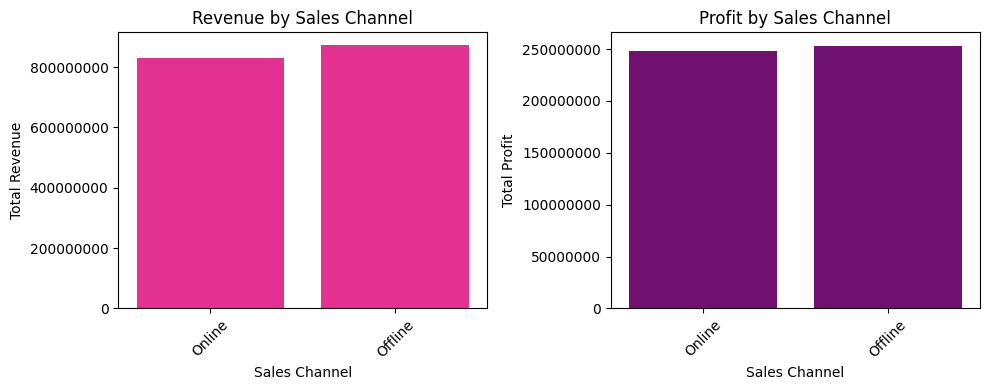

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(
    x='Sales Channel',
    y='Revenue',
    data=joined_data,
    estimator=sum,
    errorbar=("ci", False),
    color='deeppink',
    ax=ax[0]
)
ax[0].set_title('Revenue by Sales Channel')
ax[0].set_ylabel('Total Revenue')
ax[0].tick_params(axis='x', rotation=45)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(
    x='Sales Channel',
    y='Profit',
    data=joined_data,
    estimator=sum,
    errorbar=("ci", False),
    color='purple',
    ax=ax[1]
)
ax[1].set_title('Profit by Sales Channel')
ax[1].set_ylabel('Total Profit')
ax[1].tick_params(axis='x', rotation=45)
ax[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

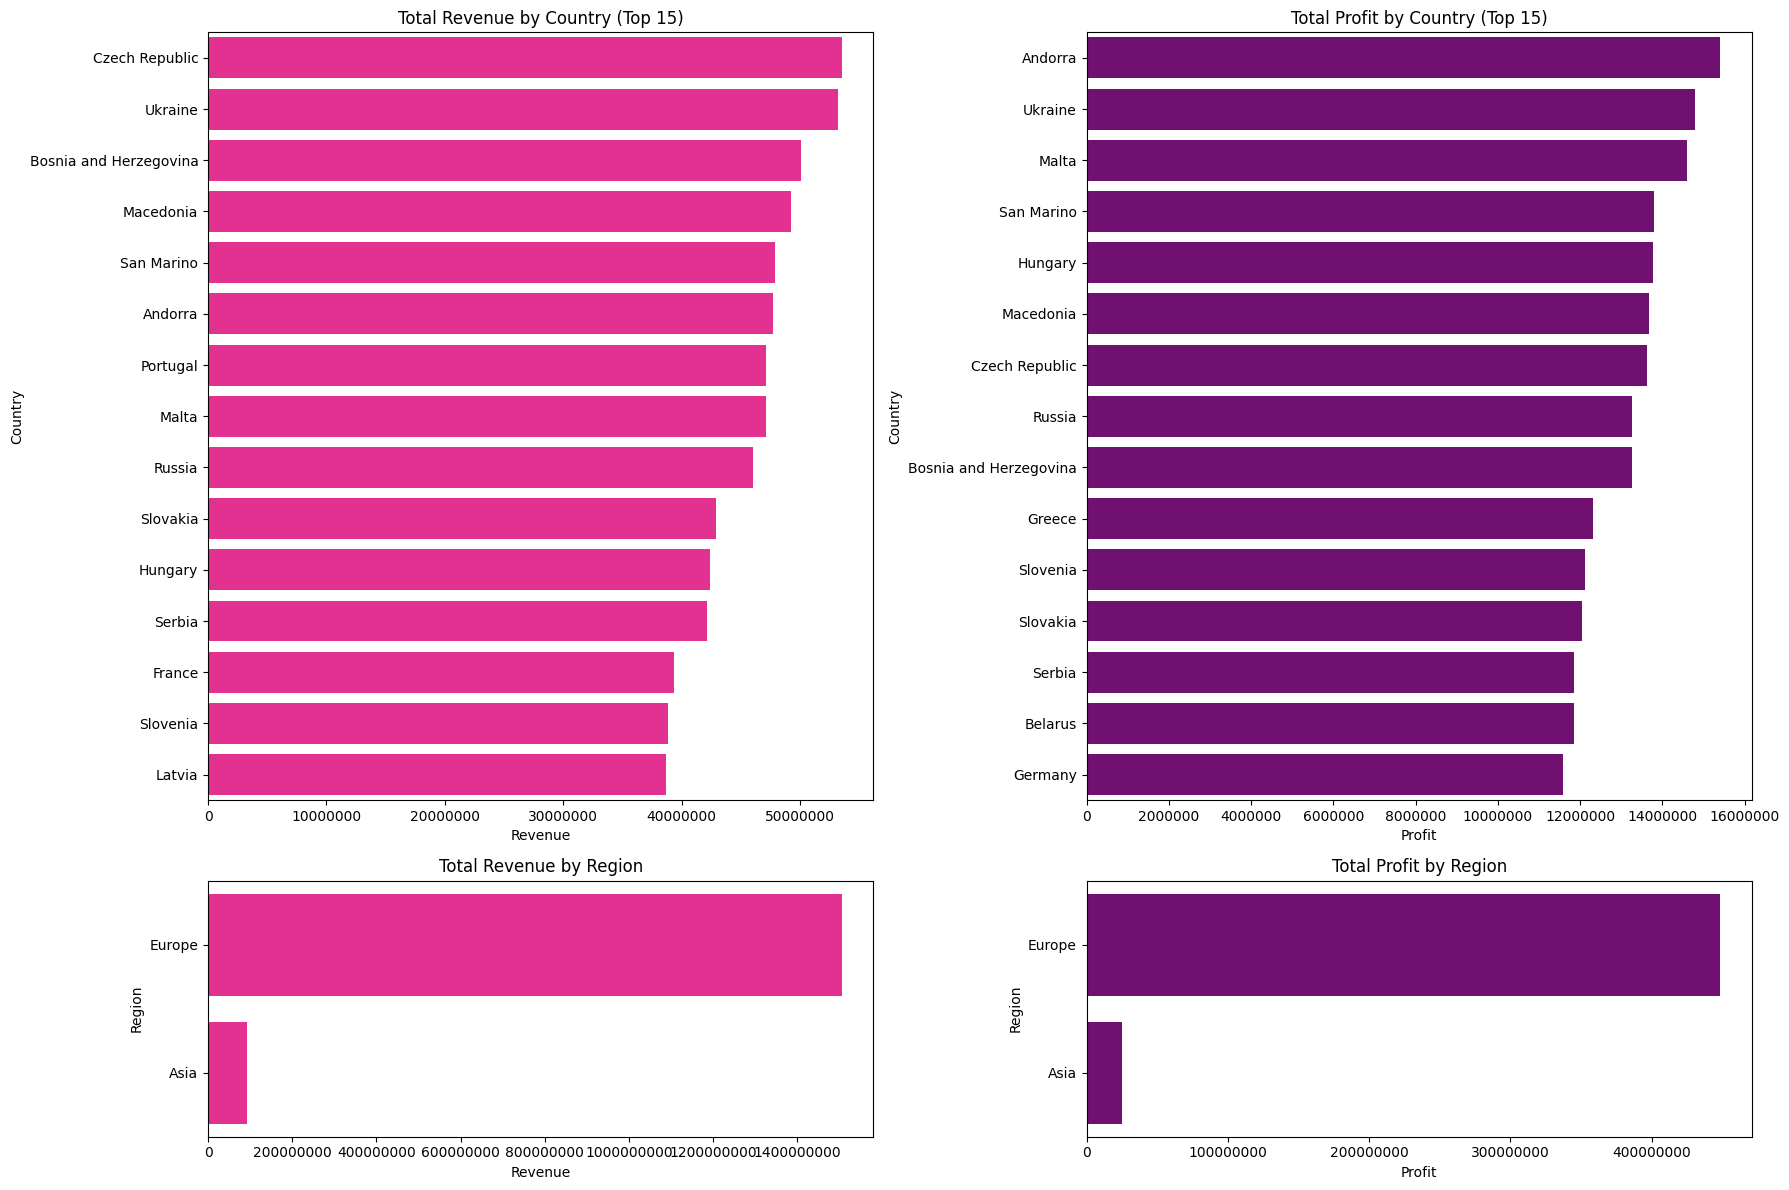

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

joined_data_geography = joined_data.dropna(subset=['Country', 'region', 'sub-region'])

fig, ax = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})

sns.barplot(
    x='Revenue',
    y='Country',
    data=joined_data_geography,
    estimator=sum,
    errorbar=("ci", False),
    color='deeppink',
    ax=ax[0,0],
    order=joined_data_geography.groupby('Country')['Revenue'].sum().nlargest(15).index
)
ax[0,0].set_title('Total Revenue by Country (Top 15)')
ax[0,0].set_xlabel('Revenue')
ax[0,0].set_ylabel('Country')
ax[0,0].ticklabel_format(style='plain', axis='x')


sns.barplot(
    x='Profit',
    y='Country',
    data=joined_data_geography,
    estimator=sum,
    errorbar=("ci", False),
    color='purple',
    ax=ax[0,1],
    order=joined_data_geography.groupby('Country')['Profit'].sum().nlargest(15).index
)
ax[0,1].set_title('Total Profit by Country (Top 15)')
ax[0,1].set_xlabel('Profit')
ax[0,1].set_ylabel('Country')
ax[0,1].ticklabel_format(style='plain', axis='x')

sns.barplot(
    x='Revenue',
    y='region',
    data=joined_data_geography,
    estimator=sum,
    errorbar=("ci", False),
    color='deeppink',
    ax=ax[1,0],
    order=joined_data_geography.groupby('region')['Revenue'].sum().sort_values(ascending=False).index
)
ax[1,0].set_title('Total Revenue by Region')
ax[1,0].set_xlabel('Revenue')
ax[1,0].set_ylabel('Region')
ax[1,0].ticklabel_format(style='plain', axis='x')


sns.barplot(
    x='Profit',
    y='region',
    data=joined_data_geography,
    estimator=sum,
    errorbar=("ci", False),
    color='purple',
    ax=ax[1,1],
    order=joined_data_geography.groupby('region')['Profit'].sum().sort_values(ascending=False).index
)
ax[1,1].set_title('Total Profit by Region')
ax[1,1].set_xlabel('Profit')
ax[1,1].set_ylabel('Region')
ax[1,1].ticklabel_format(style='plain', axis='x')


plt.tight_layout()
plt.show()

Найбільше прибутку компанії приносять такі категорії товарів:
*  Cosmetics ≈90 мільйонів дол.
*  Supplies ≈80 мільйонів дол.
*  Household ≈77 мільйонів дол.

Канали продажів приблизно на одному рівні і в прибутку і в доходах, тому вони однаково важливі.
Найбільше прибутку та доходів в Європі. Європа переважає над Азією більш ніж в 15 разів і в прибутках і в доходах.
Топ5 країн, що приносять прибуток:
*  Андорра
*  Україна
*  Мальта
*  Сан-Маріно
*  Угорщина

Text(0, 0.5, 'Days')

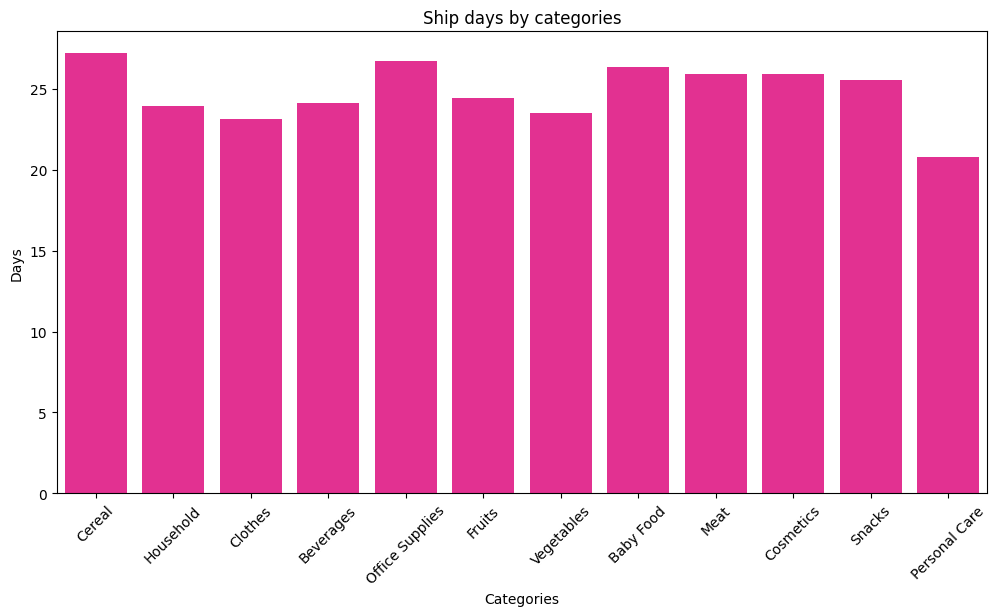

In [ ]:
joined_data['Shipping Days'] = (joined_data['Ship Date'] - joined_data['Order Date']).dt.days

plt.figure(figsize=(12, 6))

sns.barplot(
    x='item_type',
    y='Shipping Days',
    data=joined_data,
    color="deeppink",
    errorbar=("ci", False)
)
plt.title('Ship days by categories')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.ylabel('Days')

<ipython-input-28-a626604117e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_data_geography['Shipping Days'] = (joined_data_geography['Ship Date'] - joined_data_geography['Order Date']).dt.days


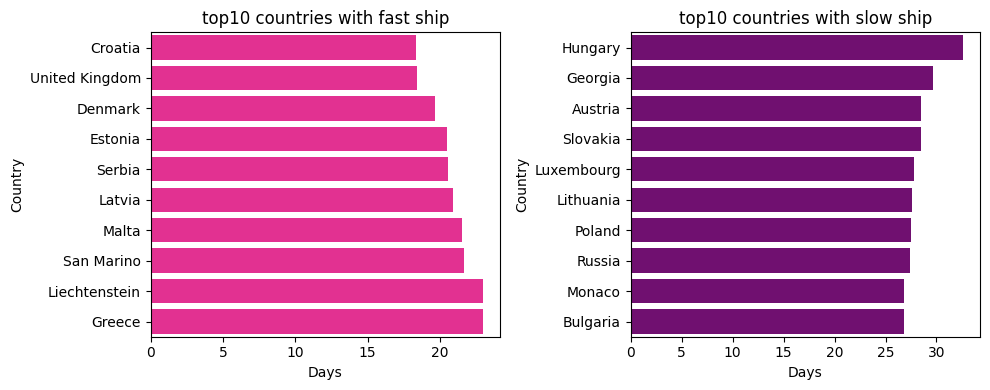

In [ ]:
joined_data_geography['Shipping Days'] = (joined_data_geography['Ship Date'] - joined_data_geography['Order Date']).dt.days

country_stats = joined_data_geography.groupby('Country')['Shipping Days'].mean().reset_index()

top_fast = country_stats.nsmallest(10, 'Shipping Days')
top_slow = country_stats.nlargest(10, 'Shipping Days')

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x='Shipping Days', y='Country', data=top_fast, color='deeppink', ax=ax[0])
ax[0].set_title('top10 countries with fast ship')
ax[0].set_xlabel('Days')

sns.barplot(x='Shipping Days', y='Country', data=top_slow, color='purple', ax=ax[1])
ax[1].set_title('top10 countries with slow ship')
ax[1].set_xlabel('Days')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Regions')

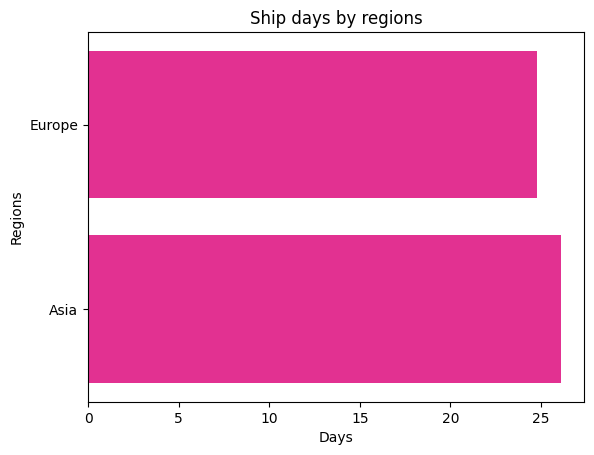

In [ ]:
sns.barplot(
    x='Shipping Days',
    y='region',
    data=joined_data_geography,
    estimator=np.mean,
    errorbar=None,
    color="deeppink"
)
plt.title('Ship days by regions')
plt.xlabel('Days')
plt.ylabel('Regions')

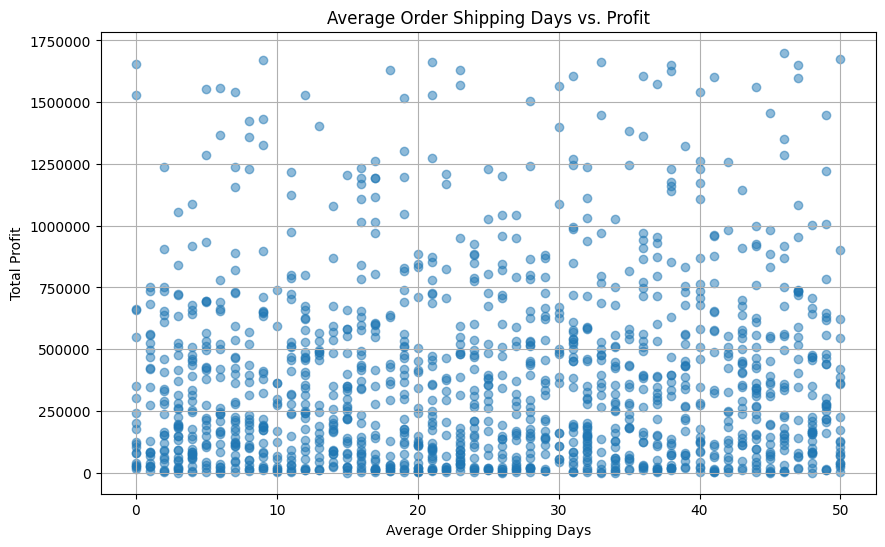

In [ ]:
avg_order_shipping = joined_data.groupby("Order ID")["Shipping Days"].mean()
avg_order_shipping_sales = joined_data.groupby("Order ID")["Profit"].sum()

plt.figure(figsize=(10, 6))
plt.scatter(avg_order_shipping, avg_order_shipping_sales, alpha=0.5)
plt.xlabel("Average Order Shipping Days")
plt.ylabel("Total Profit")
plt.title("Average Order Shipping Days vs. Profit")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

Середній інтервал часу між замовленням та його відвантаженням складає близько 25 днів. По категоріям найменший - в категорії Personal Care, найбільший - Office Supplies. По країнам найменший - в країні Хорватія, найбільший - Угорщина. Серед регіонів, з невеликою різницею, інтервал часу трохи більший в Азії. Прибуток не залежить від інтервалу часу між замовленням та його відвантаженням.

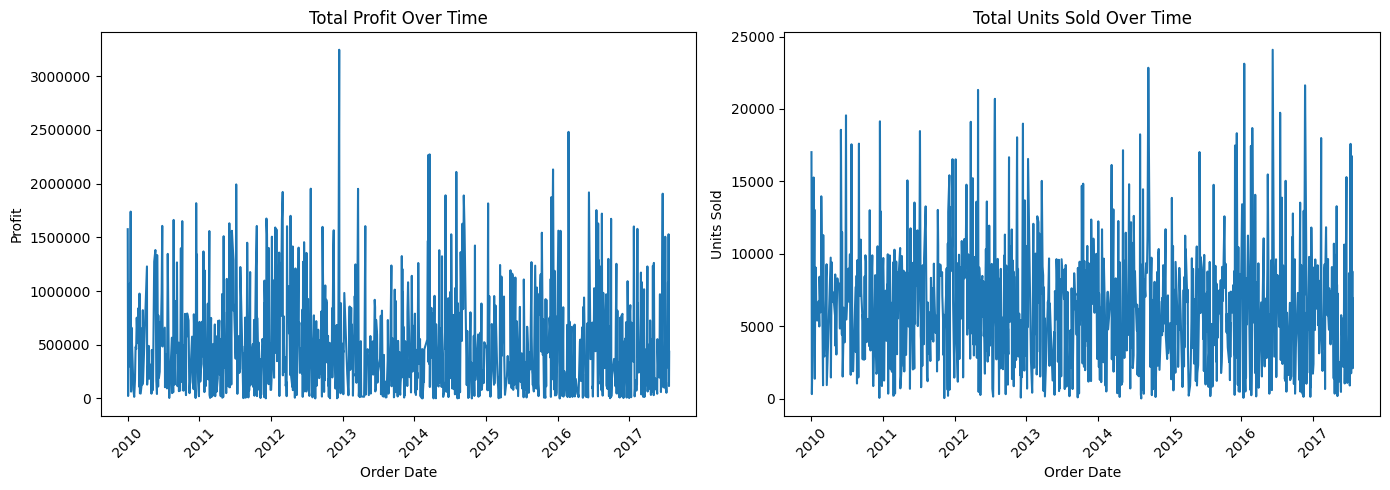

In [ ]:
grouped_date_total = (
    joined_data.groupby("Order Date")[["Profit", "Units Sold"]]
    .sum()
    .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

axes[0].plot(grouped_date_total["Order Date"], grouped_date_total["Profit"])
axes[0].set_title("Total Profit Over Time")
axes[0].set_xlabel("Order Date")
axes[0].set_ylabel("Profit")
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].tick_params(axis="x", rotation=45)

axes[1].plot(grouped_date_total["Order Date"], grouped_date_total["Units Sold"])
axes[1].set_title("Total Units Sold Over Time")
axes[1].set_xlabel("Order Date")
axes[1].set_ylabel("Units Sold")
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

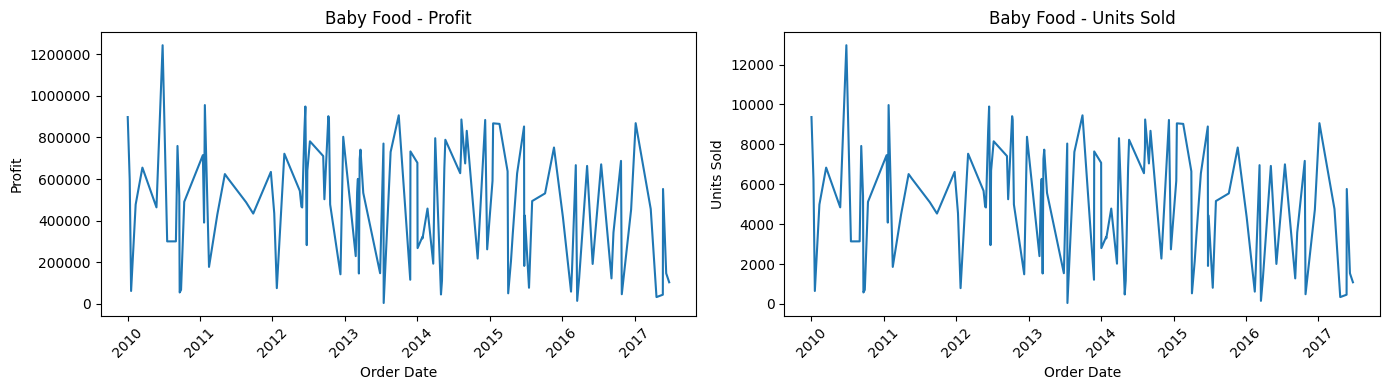

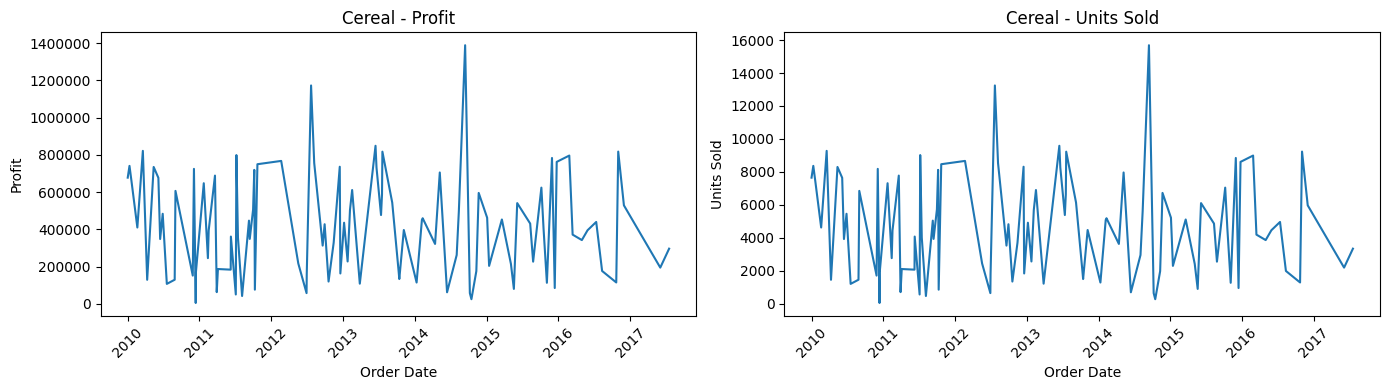

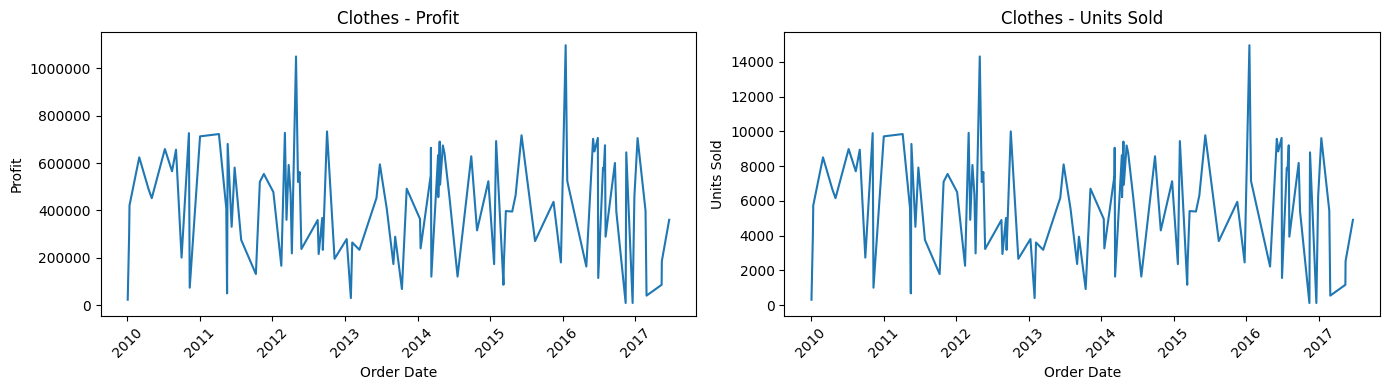

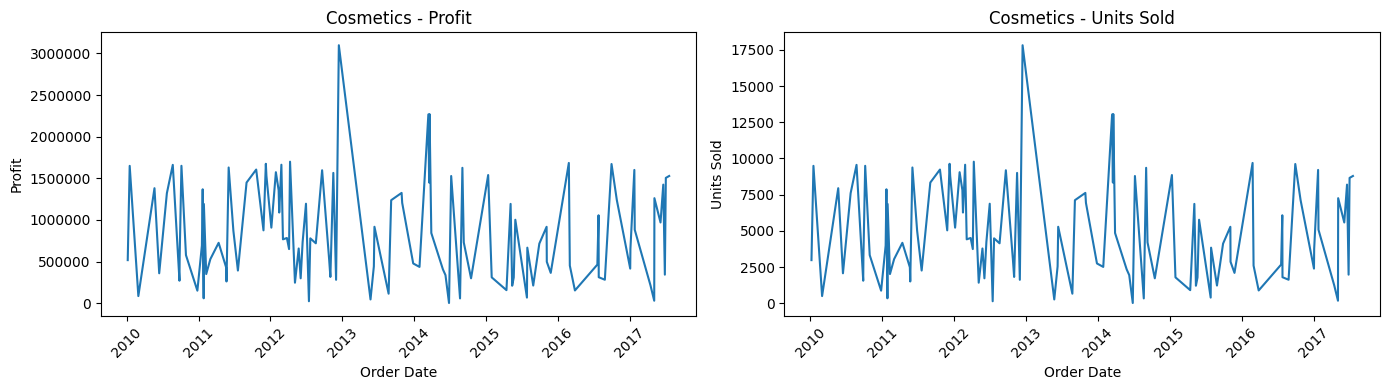

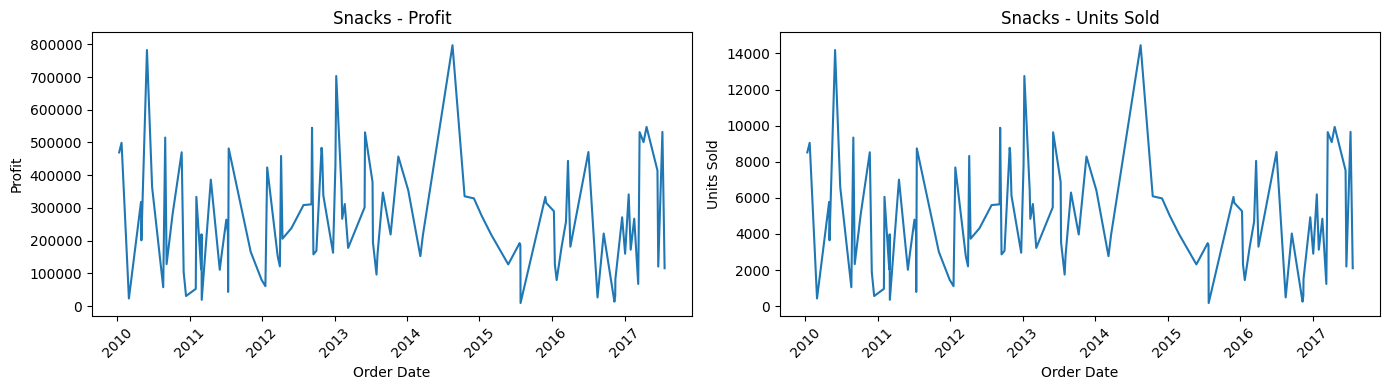

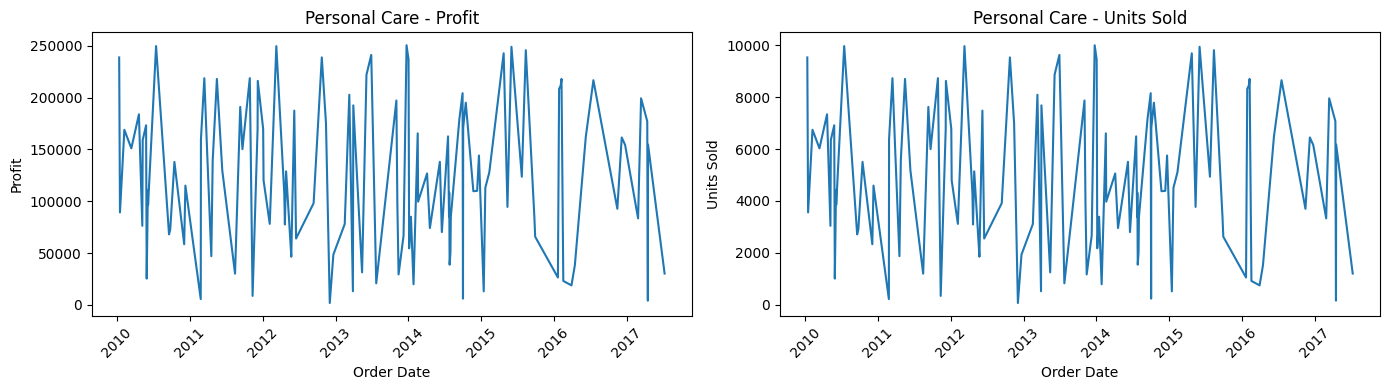

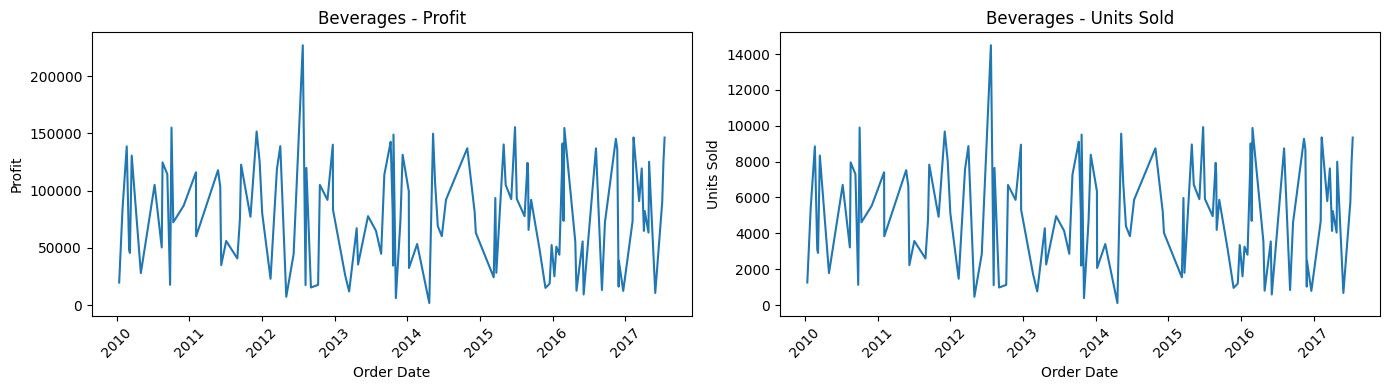

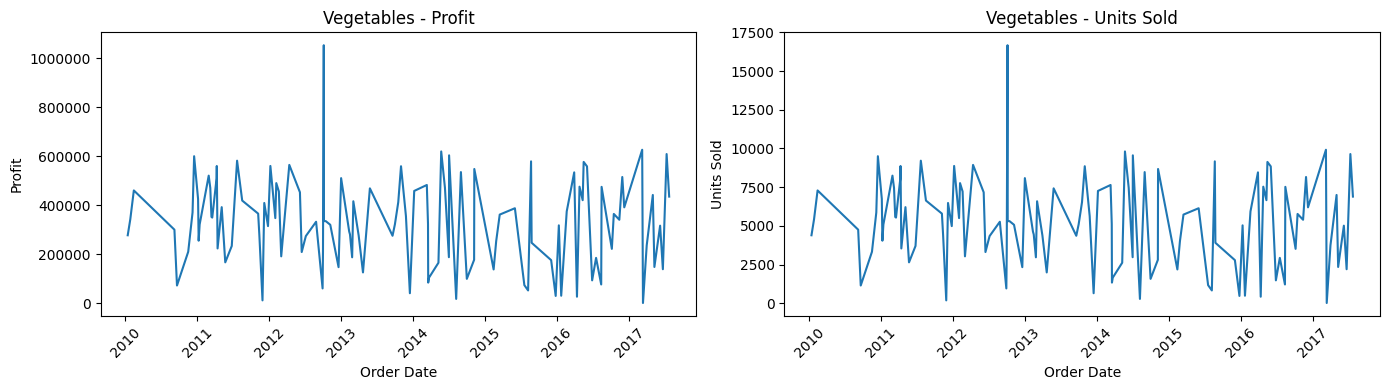

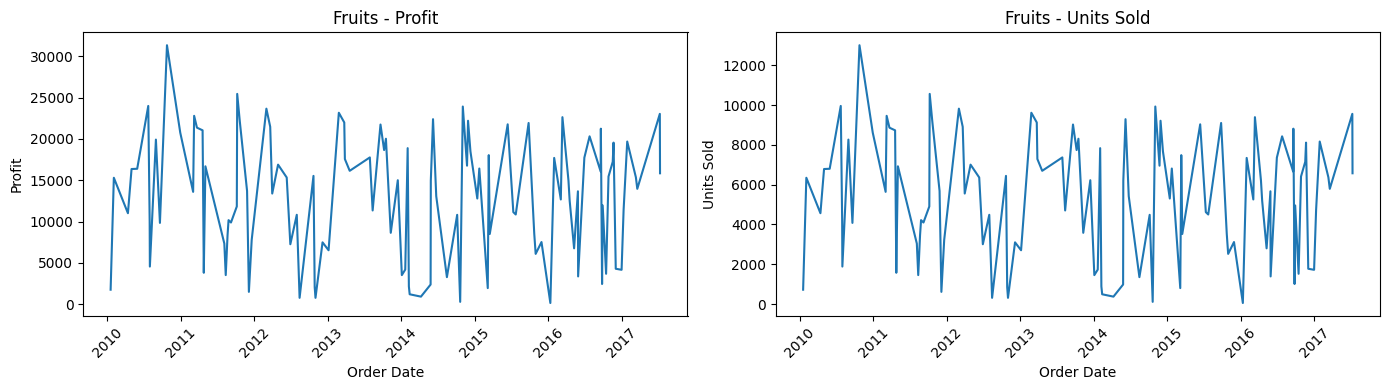

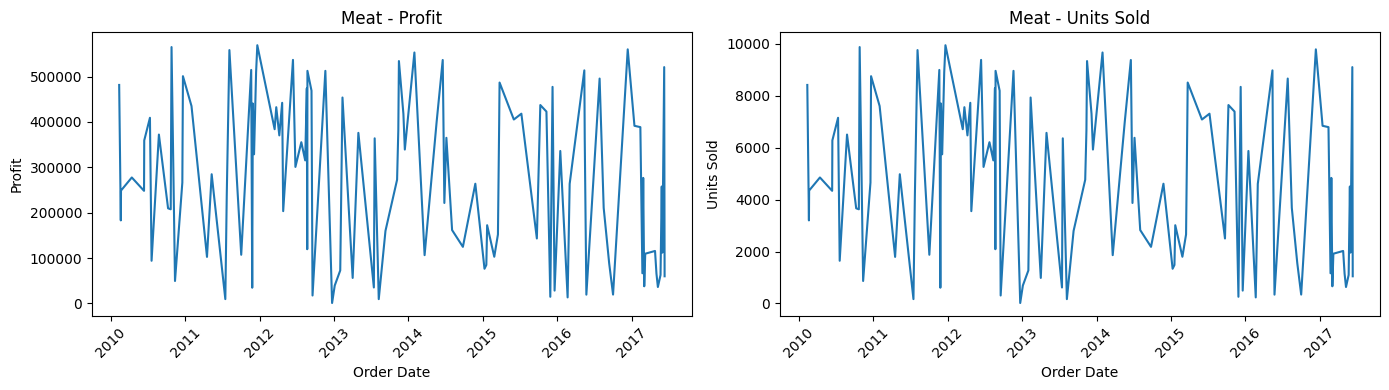

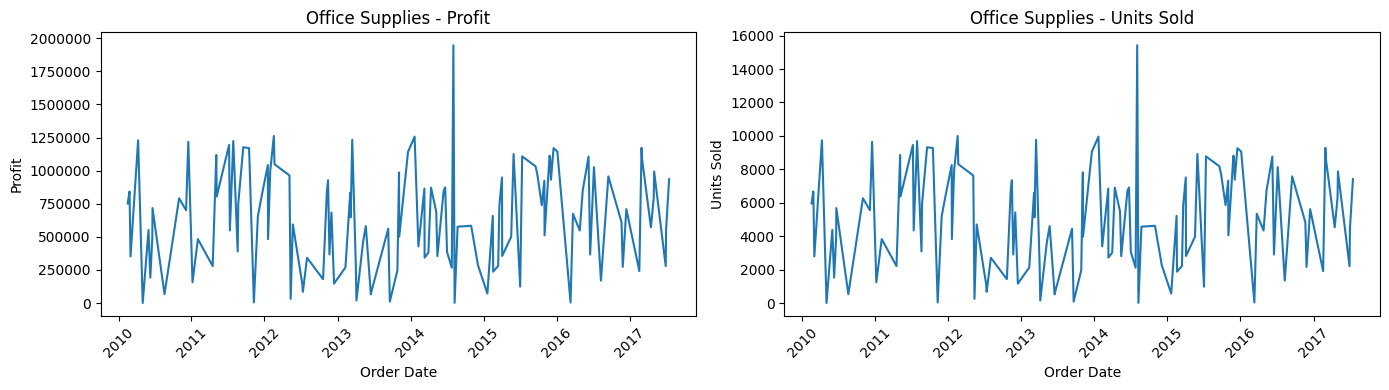

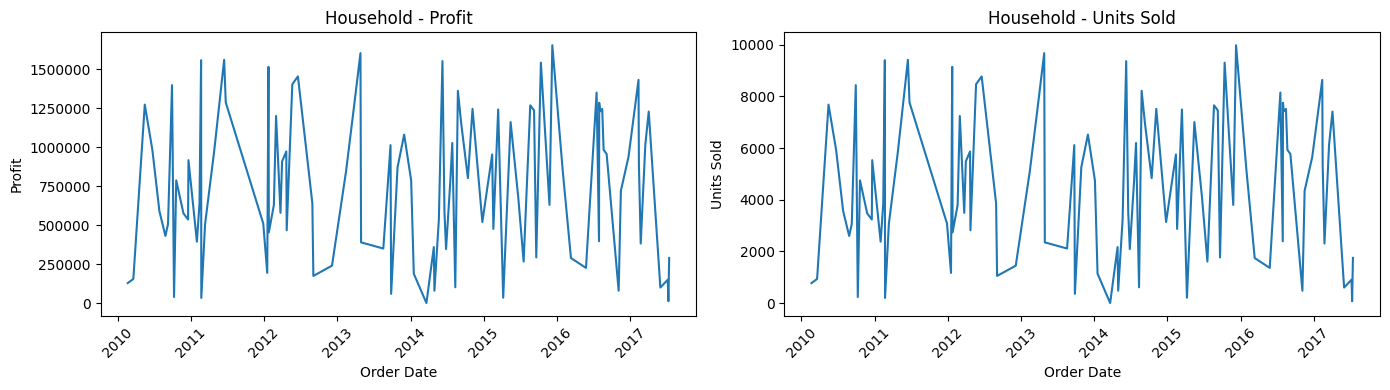

In [ ]:
grouped_date_item = (
    joined_data.groupby(["Order Date", "item_type"])[["Profit", "Units Sold"]]
    .sum()
    .reset_index()
)

categories = grouped_date_item["item_type"].unique()

for category in categories:
    data = grouped_date_item[grouped_date_item["item_type"] == category]

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

    axes[0].plot(data["Order Date"], data["Profit"])
    axes[0].set_title(f"{category} - Profit")
    axes[0].set_xlabel("Order Date")
    axes[0].set_ylabel("Profit")
    axes[0].tick_params(axis="x", rotation=45)
    axes[0].ticklabel_format(style='plain', axis='y')

    axes[1].plot(data["Order Date"], data["Units Sold"])
    axes[1].set_title(f"{category} - Units Sold")
    axes[1].set_xlabel("Order Date")
    axes[1].set_ylabel("Units Sold")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

З загального графіка видно, що найбільший прибуток був на початку 2013 року. Видно що є наявність сезонних патернів (місячна або навіть тижнева сезонність).
З графіків по категоріях видно що прибуток повністю залежить від кількості проданого товару, для різних товарів - сезонні патерни. Також є категорії (Fruits, Beverages та Personal Care) які хоч і продаються в достатній кількості, не приносять стільки ж прибутку як інші.

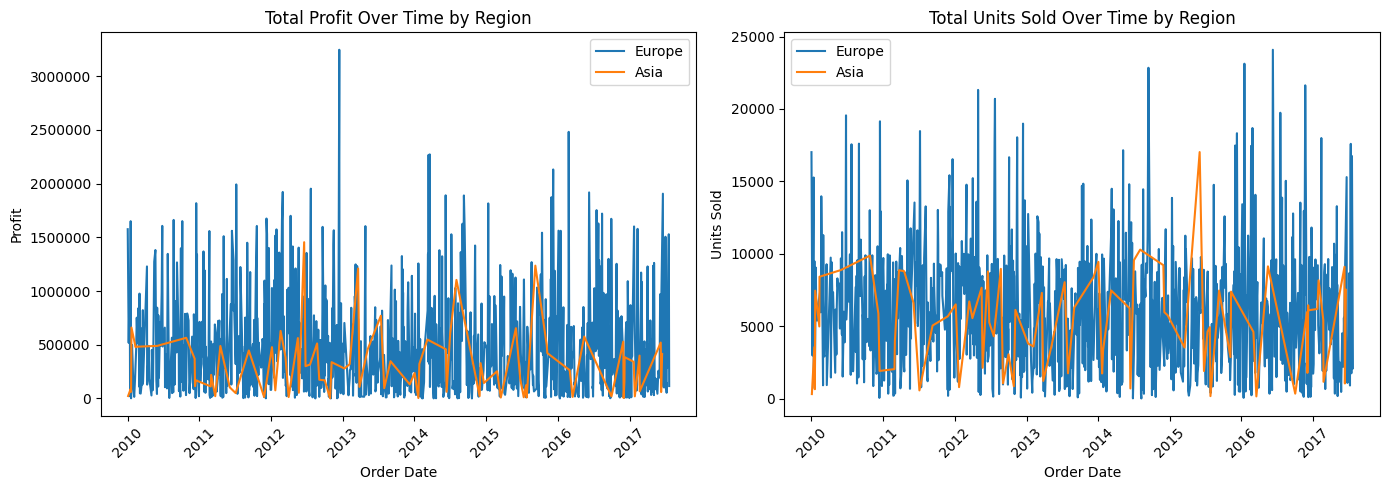

In [ ]:
grouped_date_region = (
    joined_data_geography.groupby(["Order Date", "region"])[["Profit", "Units Sold"]]
    .sum()
    .reset_index()
)
regions = grouped_date_region["region"].unique()

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

for region in regions:
    data = grouped_date_region[grouped_date_region["region"] == region]
    axes[0].plot(data["Order Date"], data["Profit"], label=region)

axes[0].set_title("Total Profit Over Time by Region")
axes[0].set_xlabel("Order Date")
axes[0].set_ylabel("Profit")
axes[0].tick_params(axis="x", rotation=45)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].legend()

for region in regions:
    data = grouped_date_region[grouped_date_region["region"] == region]
    axes[1].plot(data["Order Date"], data["Units Sold"], label=region)

axes[1].set_title("Total Units Sold Over Time by Region")
axes[1].set_xlabel("Order Date")
axes[1].set_ylabel("Units Sold")
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

Азія приносить менше прибутку ніж Європа з року в рік, основну частину прибутку забирає на себе Європа. Найбільше прибутку в Азії було в середині 2012 року, а найбільше товарів було продано в середині 2015 року.

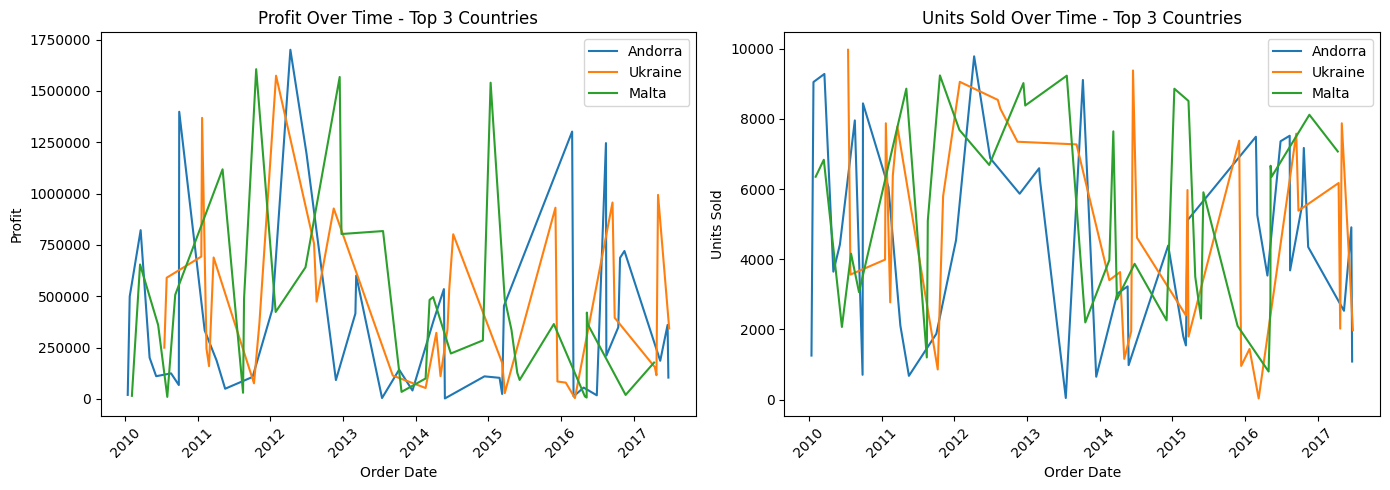

In [ ]:
top_countries = (
    joined_data_geography.groupby("Country")["Profit"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

filtered_top_countries = joined_data_geography[joined_data_geography["Country"].isin(top_countries)]

grouped_countries = (
    filtered_top_countries.groupby(["Order Date", "Country"])[["Profit", "Units Sold"]]
    .sum()
    .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

for country in top_countries:
    data = grouped_countries[grouped_countries["Country"] == country]
    axes[0].plot(data["Order Date"], data["Profit"], label=country)

axes[0].set_title("Profit Over Time - Top 3 Countries")
axes[0].set_xlabel("Order Date")
axes[0].set_ylabel("Profit")
axes[0].tick_params(axis="x", rotation=45)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].legend()

for country in top_countries:
    data = grouped_countries[grouped_countries["Country"] == country]
    axes[1].plot(data["Order Date"], data["Units Sold"], label=country)

axes[1].set_title("Units Sold Over Time - Top 3 Countries")
axes[1].set_xlabel("Order Date")
axes[1].set_ylabel("Units Sold")
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


Для топ 3 країн що приносять прибуток, найбільший прибуток був з кінця 2012 року до початку 2013, а найменший на початку 2014 року.

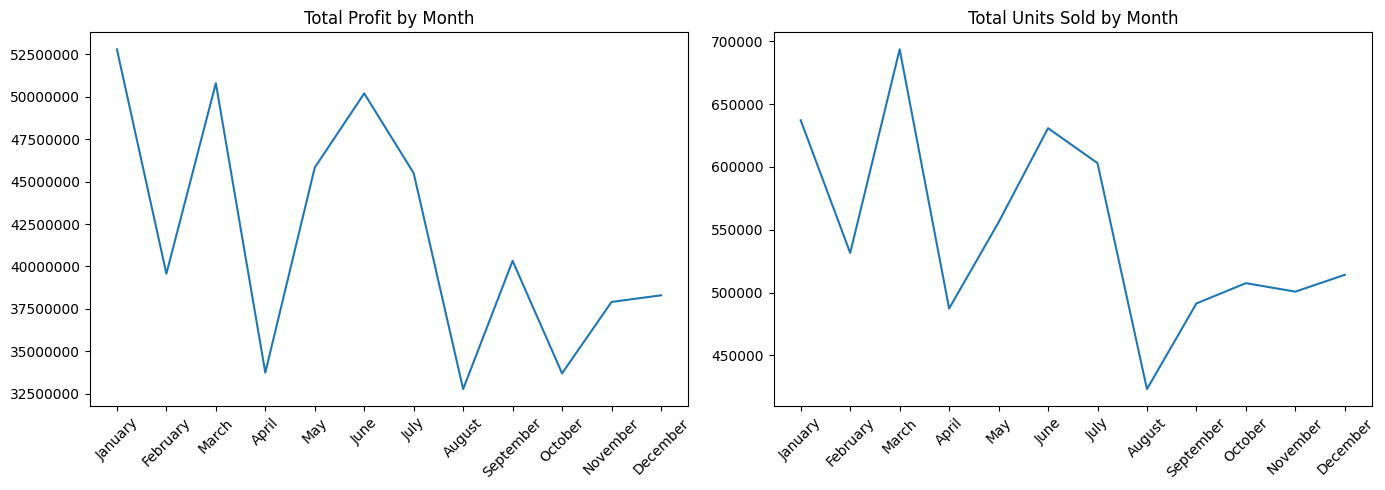

In [ ]:
grouped_month_total = (
    joined_data
    .groupby(joined_data["Order Date"].dt.month_name())[["Profit", "Units Sold"]]
    .sum()
)
grouped_month_total = grouped_month_total.reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(grouped_month_total.index, grouped_month_total["Profit"])
axes[0].set_title("Total Profit by Month")
axes[0].tick_params(axis="x", rotation=45)
axes[0].ticklabel_format(style='plain', axis='y')

axes[1].plot(grouped_month_total.index, grouped_month_total["Units Sold"])
axes[1].set_title("Total Units Sold by Month")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Найнижчі продажі та прибуток у серпні. У квітні та жовтні теж доволі низький прибуток, хоча продажі в цей час помірні, скоріш за все в цей час продається багато товару, який не приносить великого прибутку, як от Fruits, Beverages та Personal Care. Найвижчі ж продажі та прибуток у січні, березні та червні.

<ipython-input-48-a5347e3211bc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = pd.Categorical(data["Month"], categories=month_order, ordered=True)


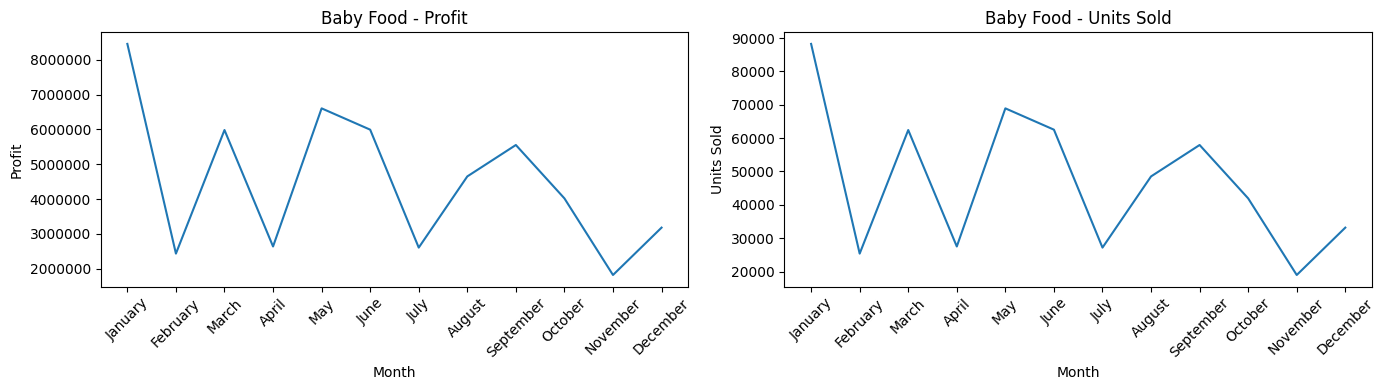

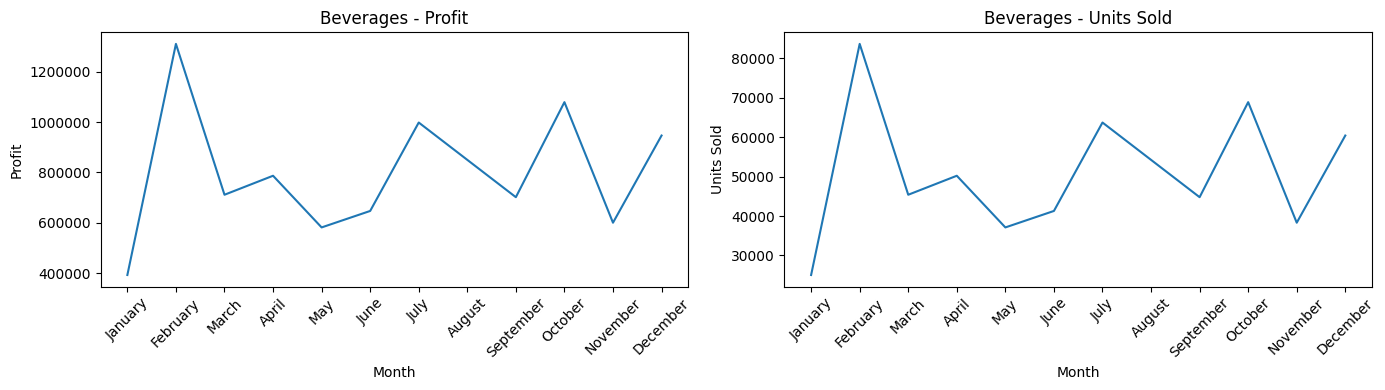

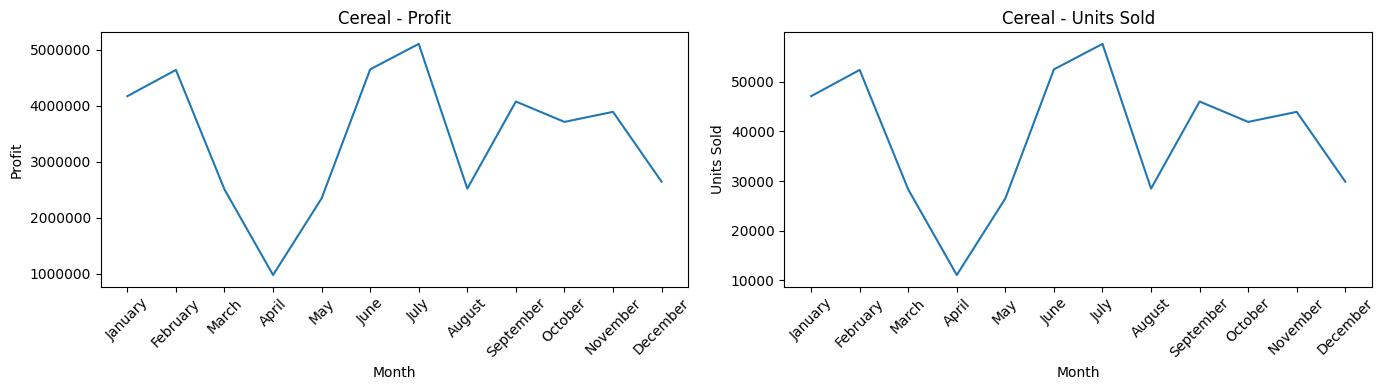

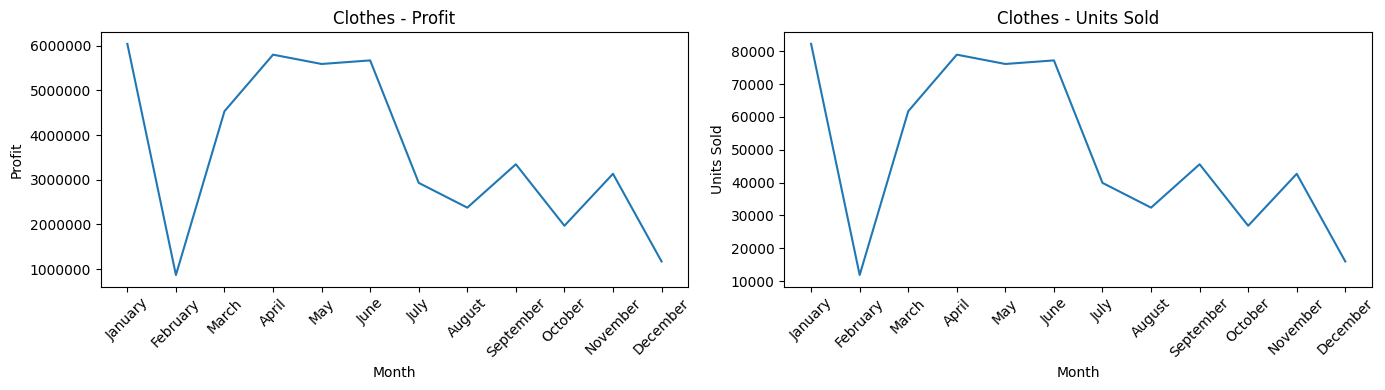

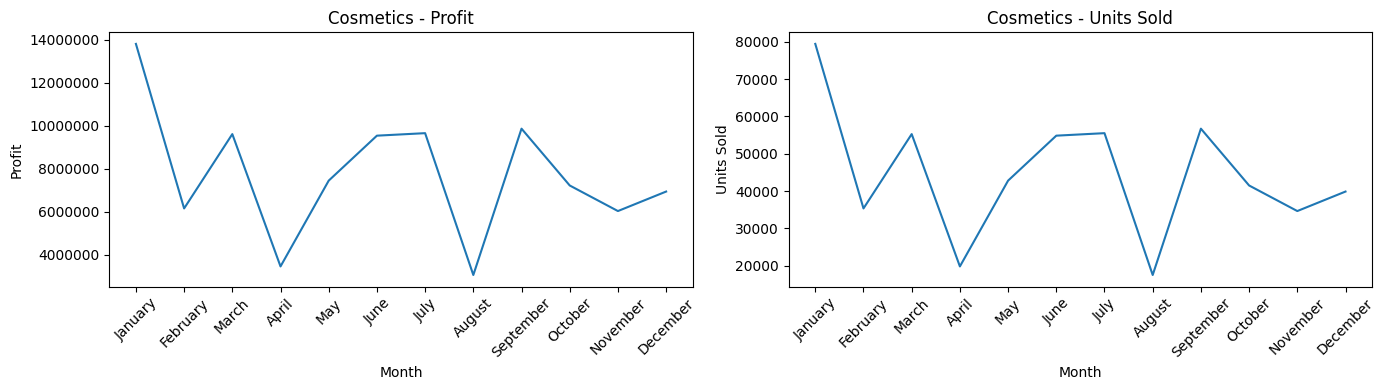

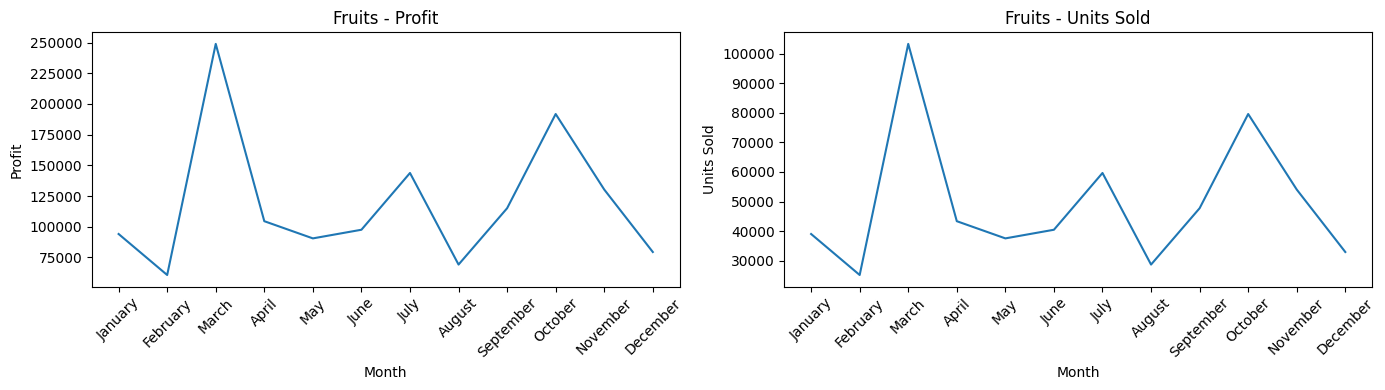

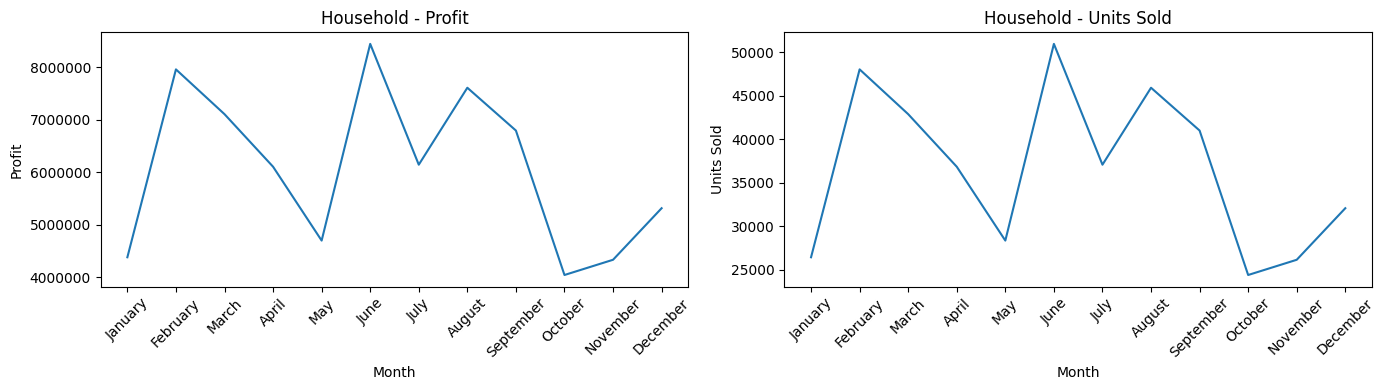

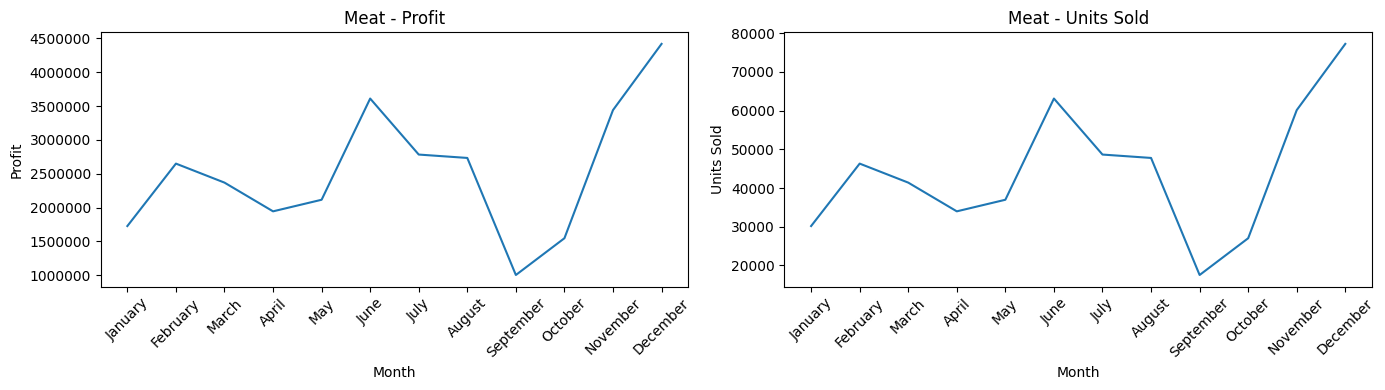

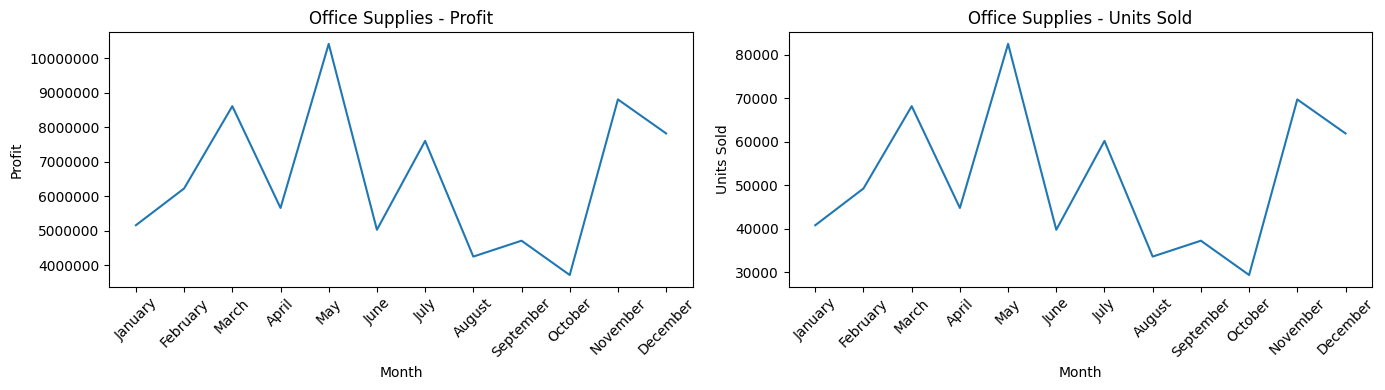

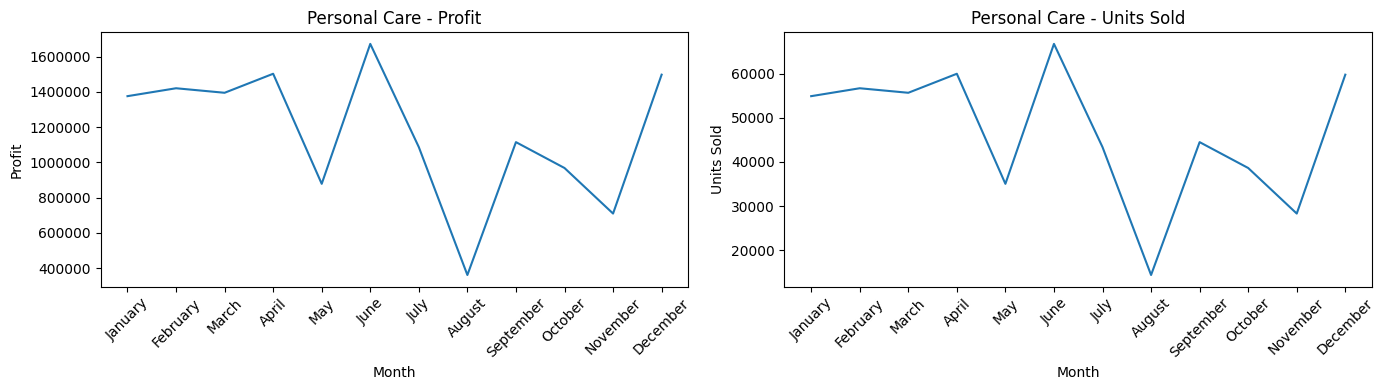

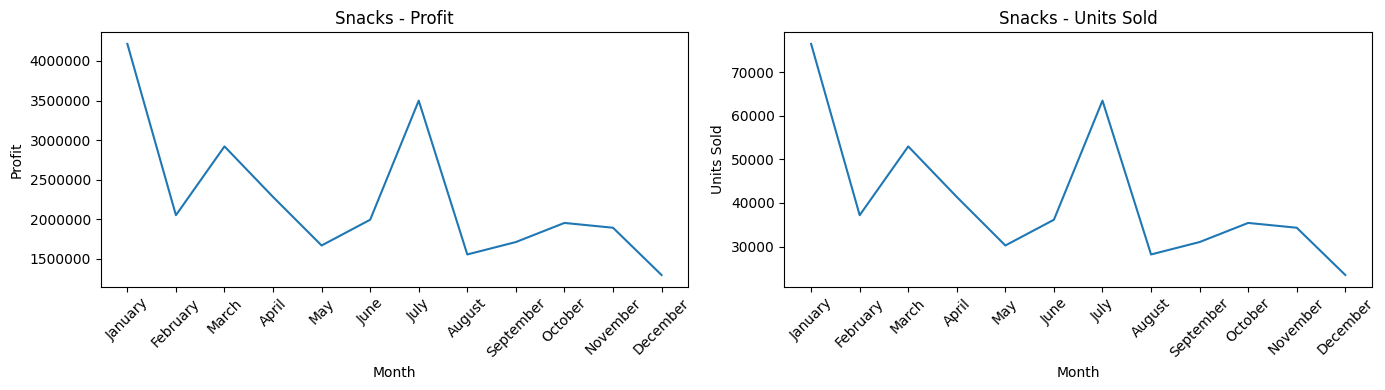

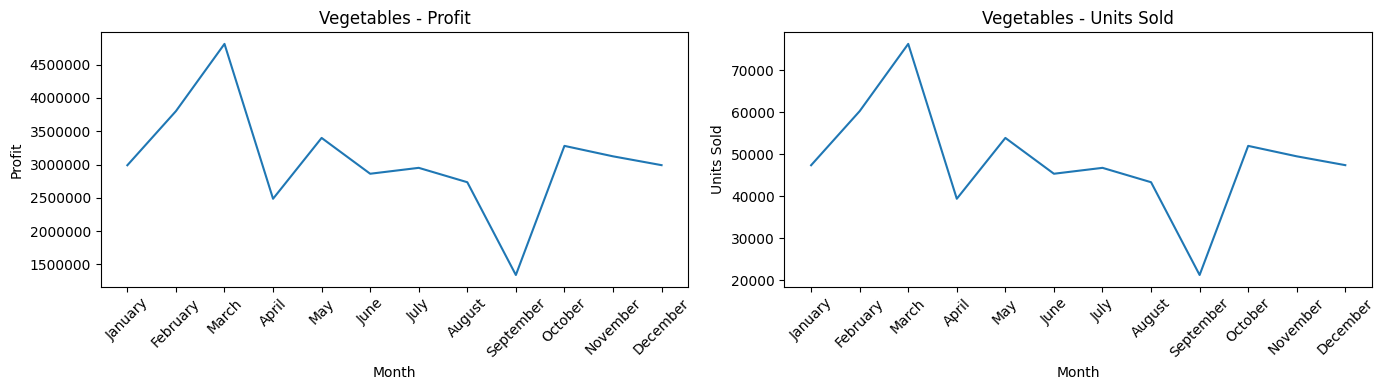

In [ ]:
joined_data["Month"] = joined_data["Order Date"].dt.month_name()

grouped_month_item = (
    joined_data
    .groupby(["Month", "item_type"])[["Profit", "Units Sold"]]
    .sum()
    .reset_index()
)
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

categories = grouped_month_item["item_type"].unique()

for category in categories:
    data = grouped_month_item[grouped_month_item["item_type"] == category]
    data["Month"] = pd.Categorical(data["Month"], categories=month_order, ordered=True)
    data = data.sort_values("Month")

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

    axes[0].plot(data["Month"], data["Profit"])
    axes[0].set_title(f"{category} - Profit")
    axes[0].set_xlabel("Month")
    axes[0].set_ylabel("Profit")
    axes[0].tick_params(axis="x", rotation=45)
    axes[0].ticklabel_format(style='plain', axis='y')

    axes[1].plot(data["Month"], data["Units Sold"])
    axes[1].set_title(f"{category} - Units Sold")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Units Sold")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

Для кожної категорії різна сезонність, як от у лютому для Beverages - найбільший прибуток, а для Clothes та Fruits- найменший.

<ipython-input-51-be7fafeb255a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_data_geography["Month"] = joined_data_geography["Order Date"].dt.month_name()


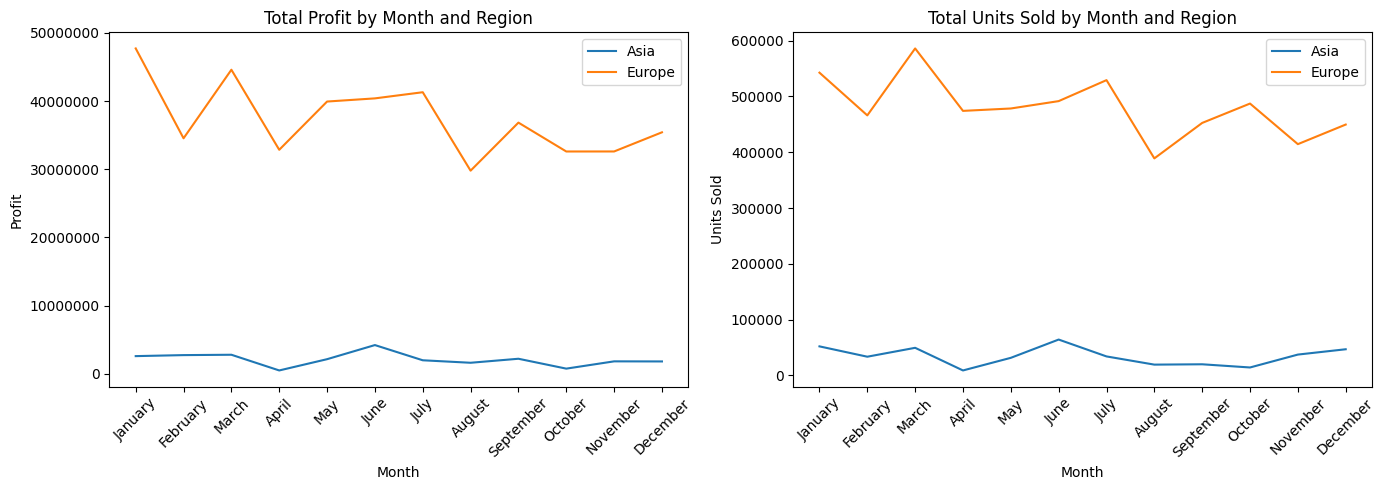

In [ ]:
joined_data_geography["Month"] = joined_data_geography["Order Date"].dt.month_name()

grouped_month_region = joined_data_geography.groupby(["Month", "region"])[["Profit", "Units Sold"]].sum().reset_index()

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for region in grouped_month_region["region"].unique():
    data = grouped_month_region[grouped_month_region["region"] == region].set_index("Month").reindex(month_order)
    axes[0].plot(data.index, data["Profit"], label=region)
    axes[1].plot(data.index, data["Units Sold"], label=region)

axes[0].set_title("Total Profit by Month and Region")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Profit")
axes[0].tick_params(axis="x", rotation=45)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].legend()

axes[1].set_title("Total Units Sold by Month and Region")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Units Sold")
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


В Азії практично не змінюється прибуток в залежності від місяця, а от в Європі показники більше коливаються, у лютому квітні та серпні - найнижчий прибуток, а у січні та березні - найвищий.

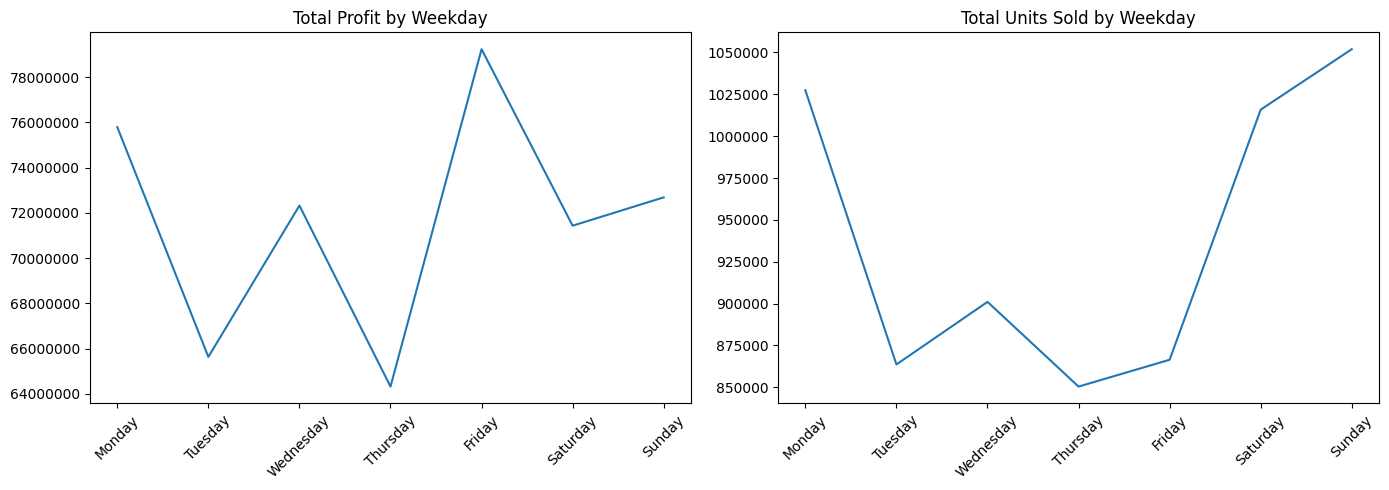

In [ ]:
joined_data["Weekday"] = joined_data["Order Date"].dt.day_name()

grouped_weekday_total = (
    joined_data
    .groupby("Weekday")[["Profit", "Units Sold"]]
    .sum()
)

weekday_order = [
    "Monday", "Tuesday", "Wednesday", "Thursday",
    "Friday", "Saturday", "Sunday"
]
grouped_weekday_total = grouped_weekday_total.reindex(weekday_order)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(grouped_weekday_total.index, grouped_weekday_total["Profit"])
axes[0].set_title("Total Profit by Weekday")
axes[0].tick_params(axis="x", rotation=45)
axes[0].ticklabel_format(style='plain', axis='y')

axes[1].plot(grouped_weekday_total.index, grouped_weekday_total["Units Sold"])
axes[1].set_title("Total Units Sold by Weekday")
axes[1].tick_params(axis="x", rotation=45)
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

Найбільший прибуток припадає на п'ятницю, найменший - на четвер. У неділю, хоч і продається велика кількість товару, прибуток - помірний, а в п'ятницю навпаки, продажей дуже мало, а ось прибутку найбільше. Все залежить від категорій речей що продаються.

<ipython-input-54-f3228d83a4a2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weekday"] = pd.Categorical(data["Weekday"], categories=weekday_order, ordered=True)


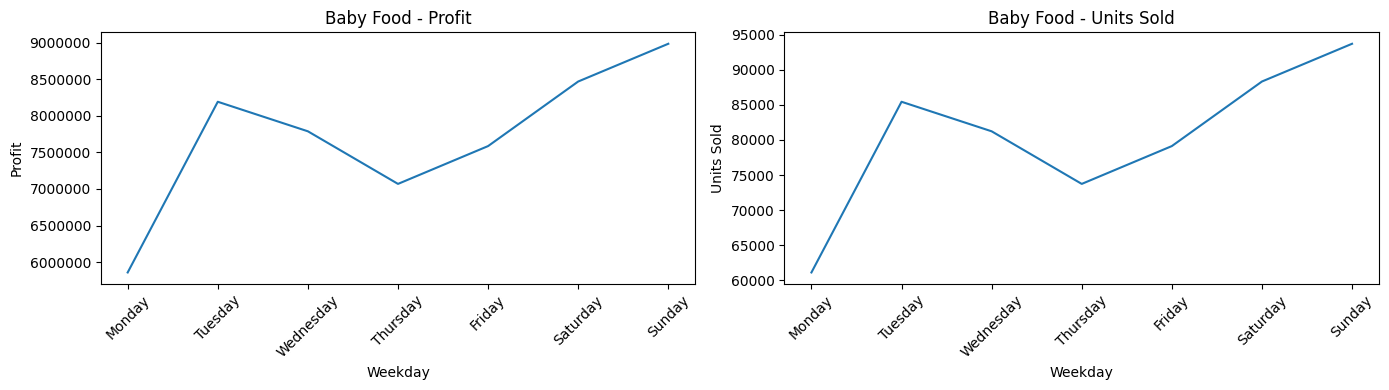

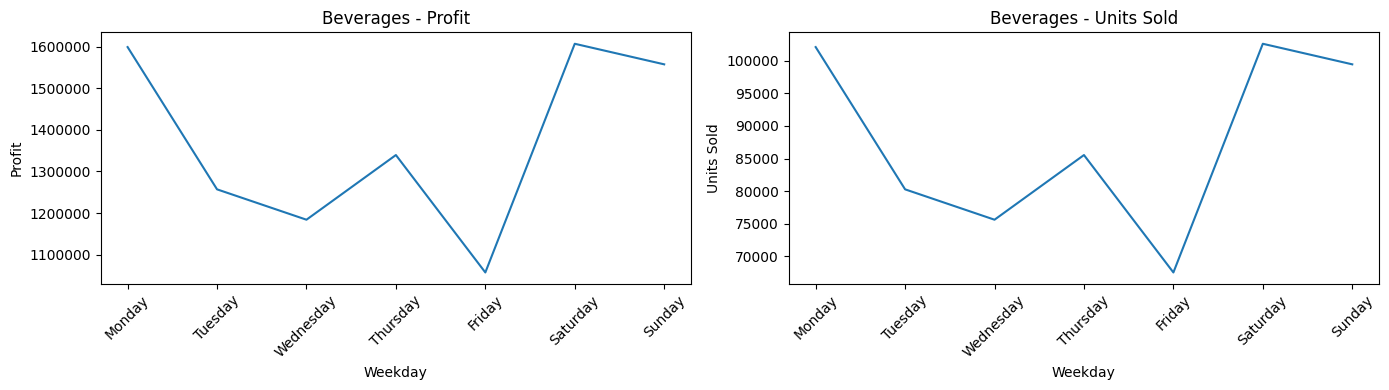

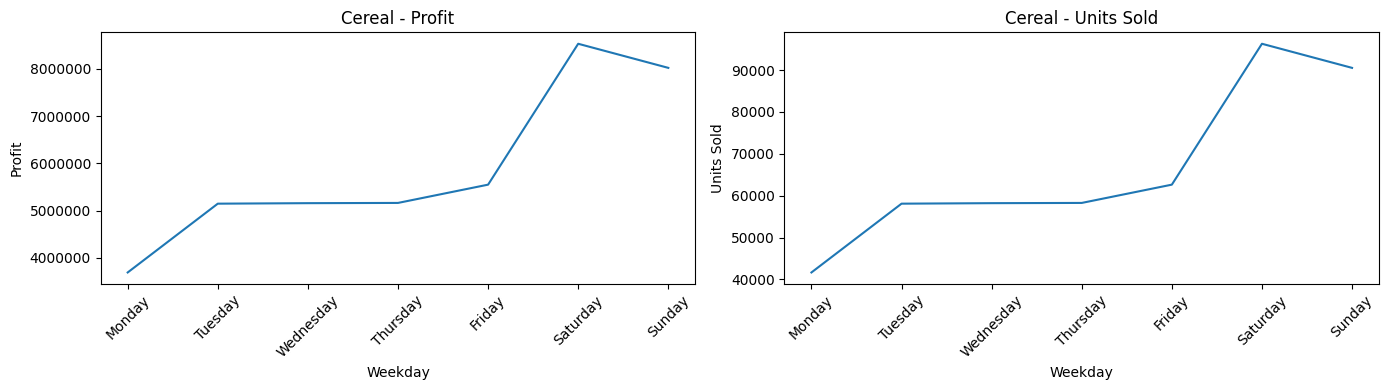

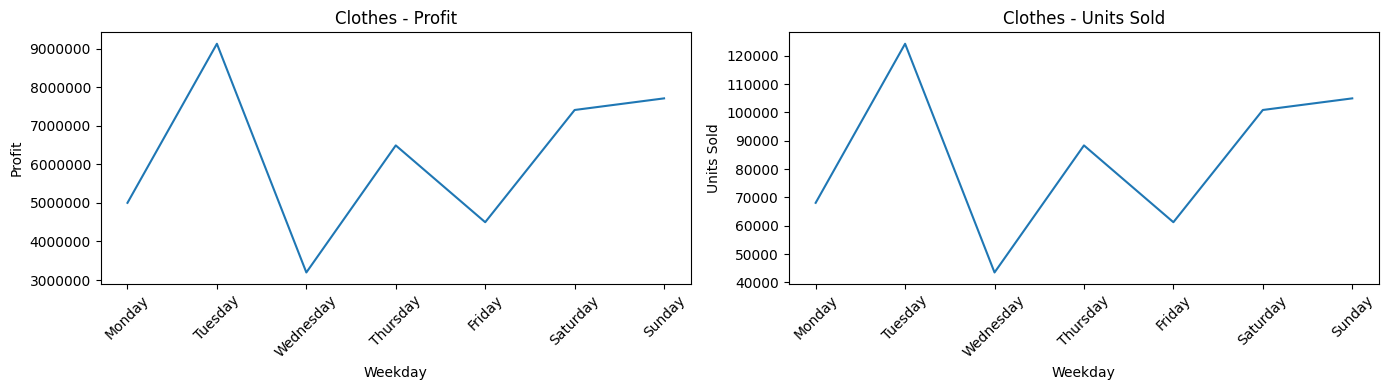

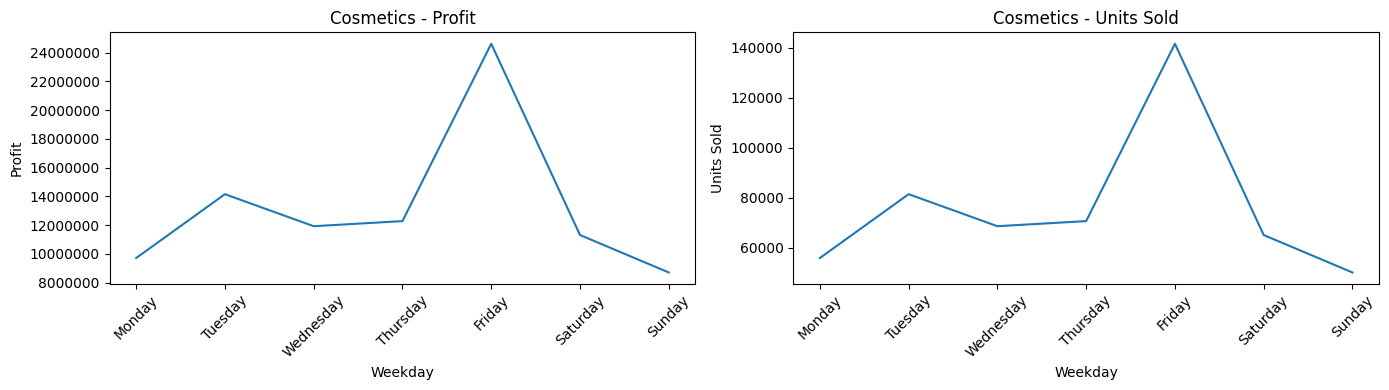

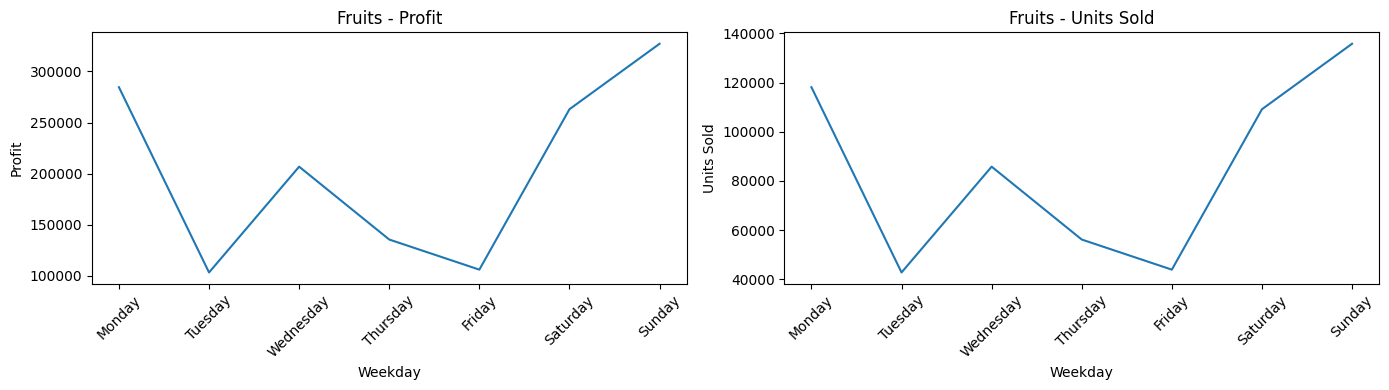

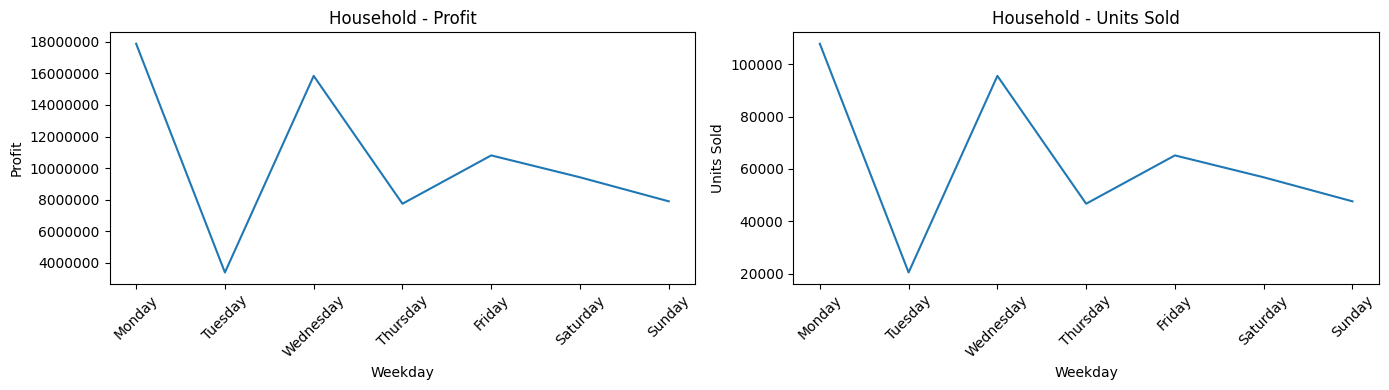

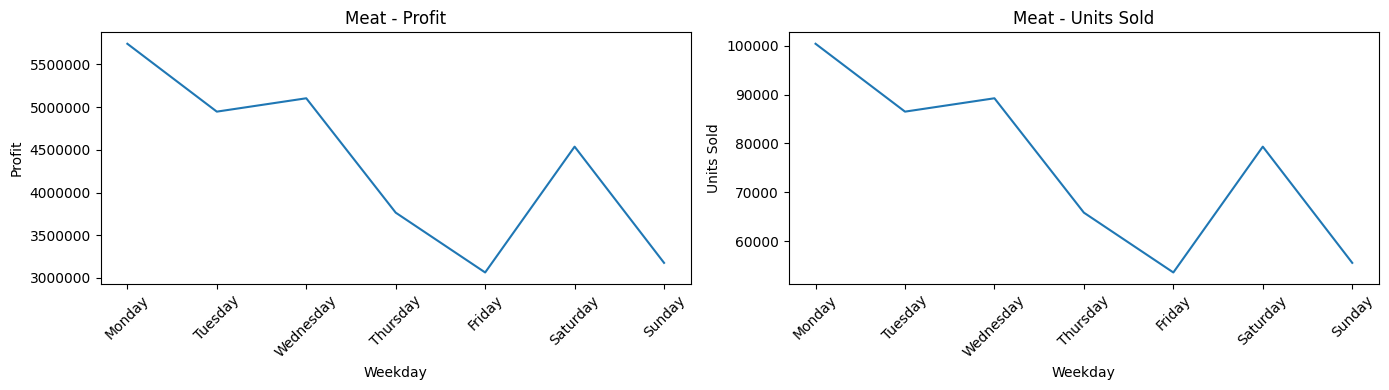

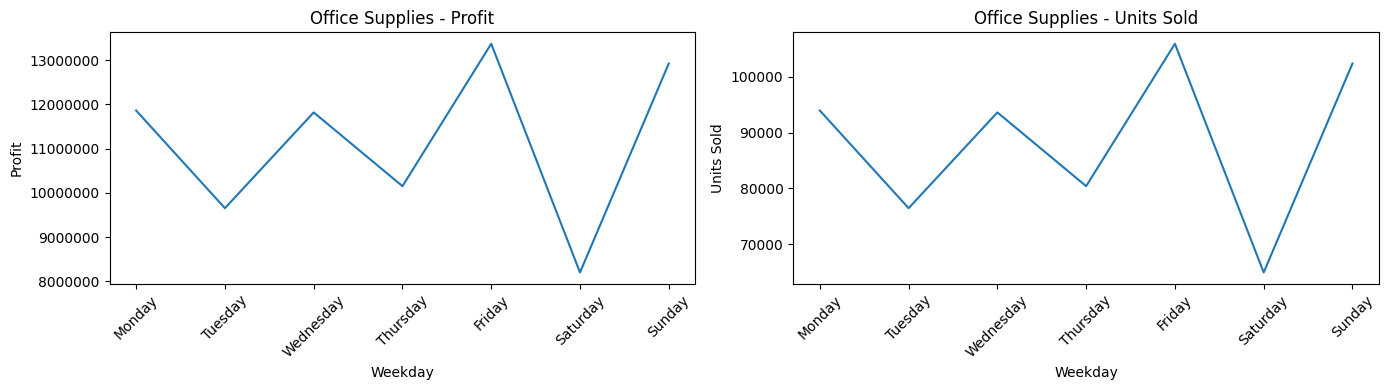

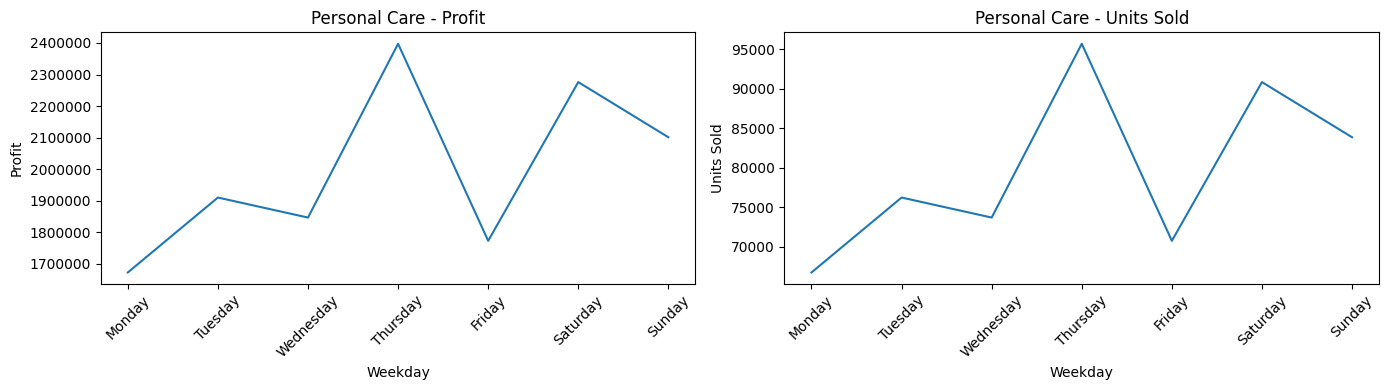

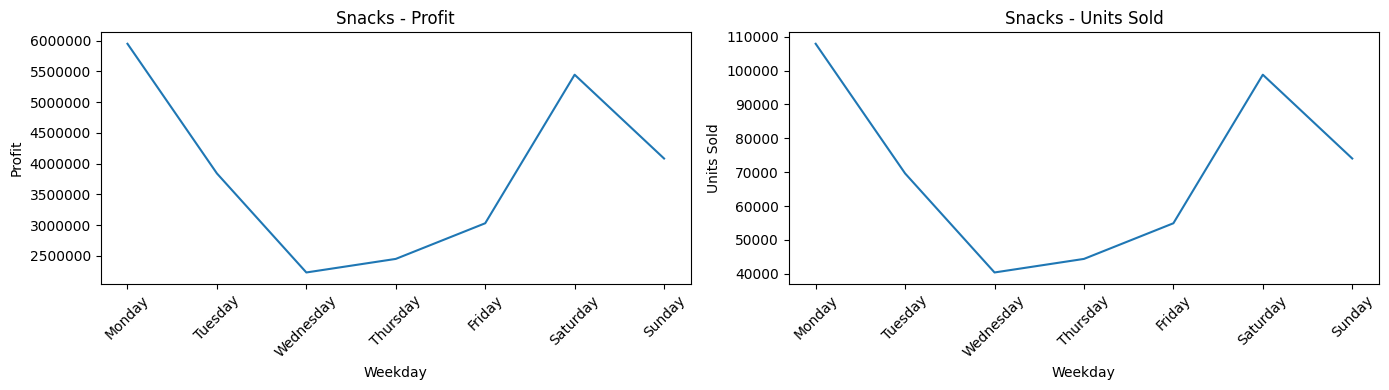

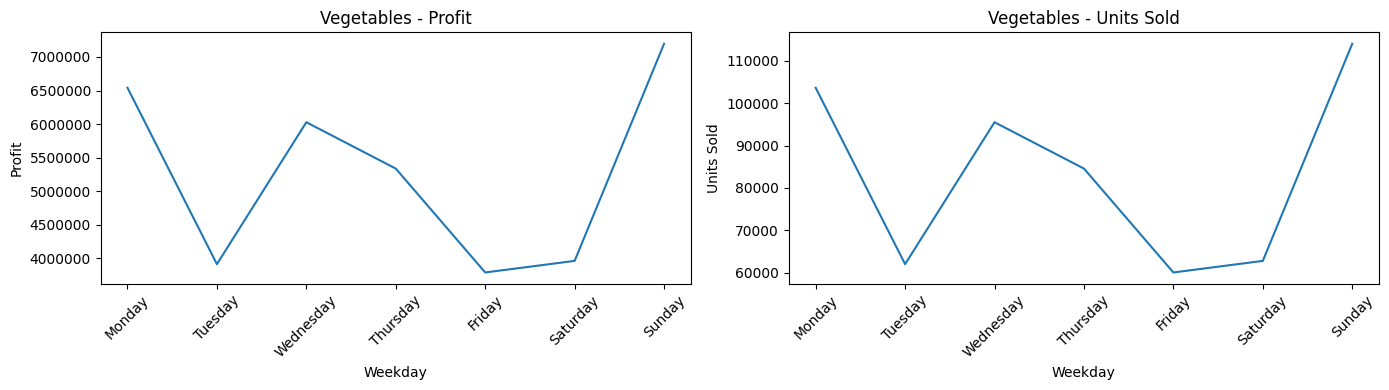

In [ ]:
grouped_weekday_item = (
    joined_data
    .groupby(["Weekday", "item_type"])[["Profit", "Units Sold"]]
    .sum()
    .reset_index()
)

categories = grouped_weekday_item["item_type"].unique()

for category in categories:
    data = grouped_weekday_item[grouped_weekday_item["item_type"] == category]
    data["Weekday"] = pd.Categorical(data["Weekday"], categories=weekday_order, ordered=True)
    data = data.sort_values("Weekday")

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

    axes[0].plot(data["Weekday"], data["Profit"])
    axes[0].set_title(f"{category} - Profit")
    axes[0].set_xlabel("Weekday")
    axes[0].set_ylabel("Profit")
    axes[0].tick_params(axis="x", rotation=45)
    axes[0].ticklabel_format(style='plain', axis='y')

    axes[1].plot(data["Weekday"], data["Units Sold"])
    axes[1].set_title(f"{category} - Units Sold")
    axes[1].set_xlabel("Weekday")
    axes[1].set_ylabel("Units Sold")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


Майже усі товари сезонні, але для кожної категорії свої тенденції та сезонності, наприклад:<br>
Для Cosmetics прибуток спочатку зростає з 10 млн (понеділок) до 24 млн (п'ятниця) а потім знижуєтьсядо 8 млн (неділя). Продажі коливаються з 60 тис. до 140 тис. одиниць.<br>
Для Household Прибуток падає з 18 млн (понеділок) до 4 млн (вівторок), потім зростає до 16 млн (середа), і до неділі знову падає до 8 млн.Продажі коливаються з 20 тис. до 100 тис. одиниць.<br>
Для категорії Cereal прибуток та продажі навпаки зростають на вихідних.<br>
А для категорії Personal Care коливання продажей не дуже значні (з 70тис. до 100 тис.)<br>
І так для кожної категорії по різному.



# Summary
На основі аналізу трьох датасетів (продукти, країни, замовлення) виявлено такі ключові інсайти:

## Дані та їх якість:

*  Продукти мають повну структуру без дублікатів.

*  У країнах видалено нерелевантні записи з пропусками, оскільки вони не впливають на подальший аналіз.

*  У замовленнях оброблено пропуски (видалено менше 1% даних), але залишено проблемні значення коду країни для фільтрації під час розрахунків.

## Фінансові показники:

Загальний прибуток складає ~501 млн дол., із явним домінуванням категорій Косметика (90 млн), Товари для дому (77 млн) та Канцелярія (80 млн).

Європа є ключовим регіоном, перевищуючи прибуток Азії у 15+ разів. Топ-5 країн: Андорра, Україна, Мальта, Сан-Маріно, Угорщина.

## Час та логістика:

Середній час між замовленням та відправкою — 25 днів, з мінімальним значенням у Хорватії та максимальним — в Угорщині.

Прибуток не корелює з тривалістю доставки, що вказує на стабільність логістичних процесів.

## Сезонність та тренди:

Піки прибутку: січень, березень, червень; спади: серпень, квітень, жовтень.

Найвищий прибуток у п’ятницю, найнижчий — у четвер.

Виражена місячна/тижнева сезонність: наприклад, косметика має зростання прибутку до п’ятниці, а товари для дому демонструють нестабільність протягом тижня.

Категорії (наприклад, Напої, Фрукти) мають високі продажі, але низьку рентабельність.

## Регіональні особливості:

В Азії відсутні значні сезонні коливання, тоді як в Європі прибуток різко зростає на початку року.

Сезонні патерни категорій суттєво відрізняються, що вимагає індивідуального підходу до асортименту та маркетингу.